# EXPOLARATORY ANALYSIS
In this jupyter notebook we will expolore the dataset obtained. In particular we'll focus on: 
1. **Seasonal plot**: basic plotting, year-wise box plot for trend, month_wise box plot for seasonality,
2. **A few metrics**:  average daily yearly and quaterly, mean and std, median close price and 10th percentile and 90th percentile
3. **Correlation and autocorrelation on PCT change**
4. **Test for random walk by applying regression model**

## Seasonal plot

First, we create **time related columns** in the original data as follows:

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# Take data
with open('sp500_data_original.pkl', 'rb') as f:
    sp500_data = pickle.load(f)

# Create time like columns
sp500_data['Year'] = sp500_data['Date'].dt.year
sp500_data['Month'] = sp500_data['Date'].dt.month
sp500_data['Day'] = sp500_data['Date'].dt.day
sp500_data['Weekday'] = sp500_data['Date'].dt.day_name()
sp500_data['Quarter'] = sp500_data['Date'].dt.quarter


### Seasonal plot
Now we create a **seasona plot**

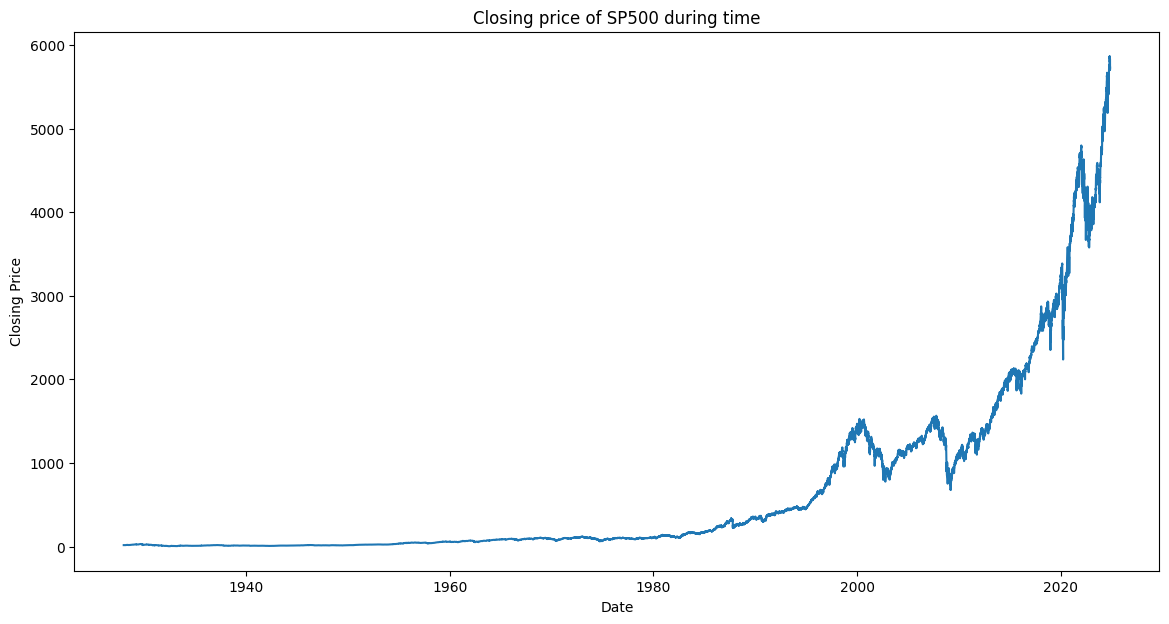

In [5]:
# Tracciare il prezzo di chiusura nel tempo
plt.figure(figsize=(14,7))
plt.plot(sp500_data['Date'], sp500_data['Close'])
plt.title('Closing price of SP500 during time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [8]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24327 entries, 0 to 24326
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   (Date, )            24327 non-null  datetime64[ns, UTC]
 1   (Adj Close, ^GSPC)  24327 non-null  float64            
 2   (Close, ^GSPC)      24327 non-null  float64            
 3   (High, ^GSPC)       24327 non-null  float64            
 4   (Low, ^GSPC)        24327 non-null  float64            
 5   (Open, ^GSPC)       24327 non-null  float64            
 6   (Volume, ^GSPC)     24327 non-null  int64              
 7   (Year, )            24327 non-null  int32              
 8   (Month, )           24327 non-null  int32              
 9   (Day, )             24327 non-null  int32              
 10  (Weekday, )         24327 non-null  object             
 11  (Quarter, )         24327 non-null  int32              
dtypes: datetime64[ns, UTC](1), float

### Year wise boxplot 

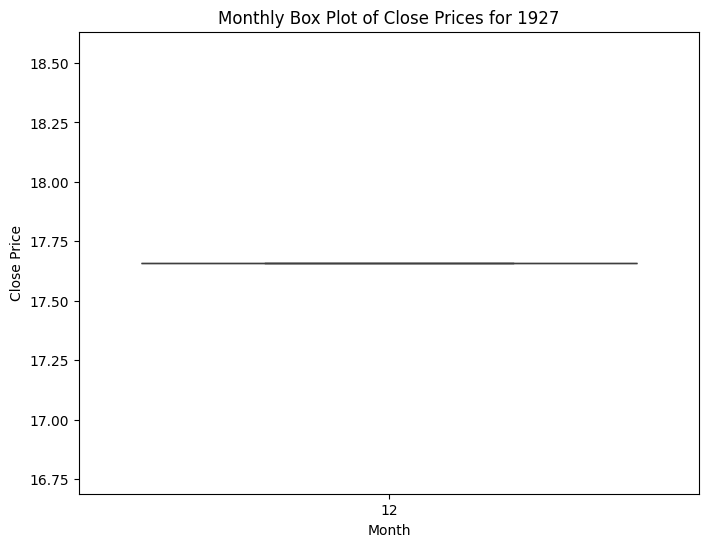

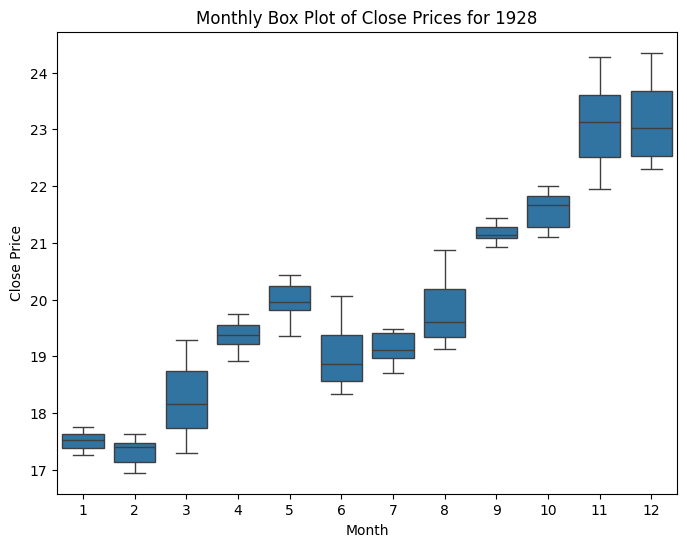

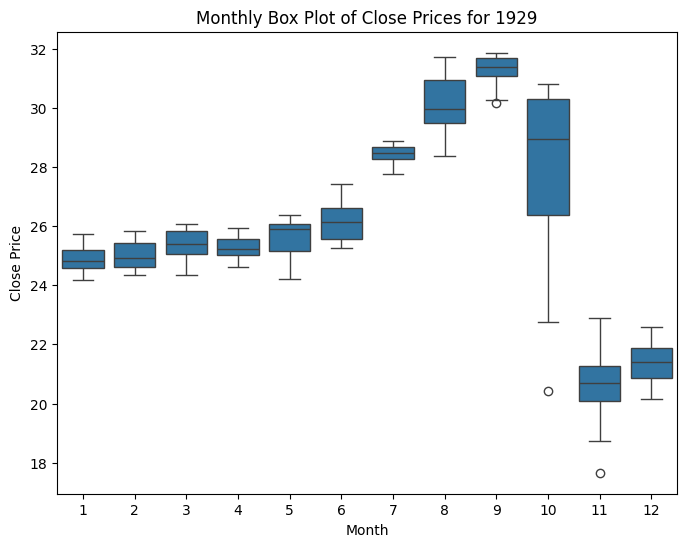

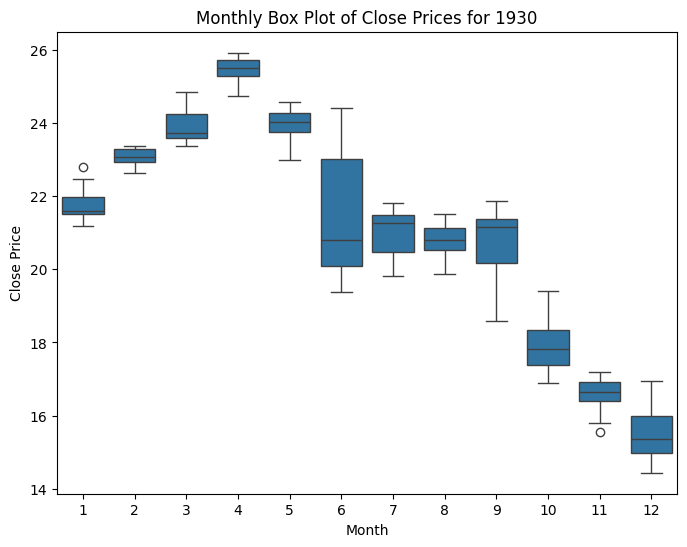

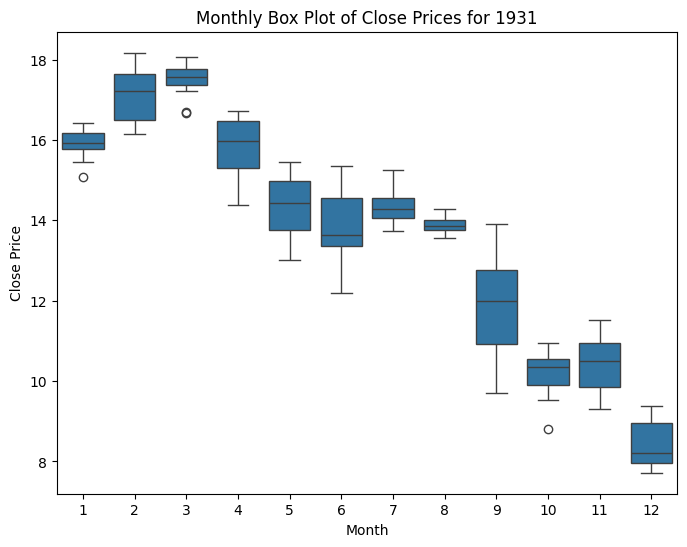

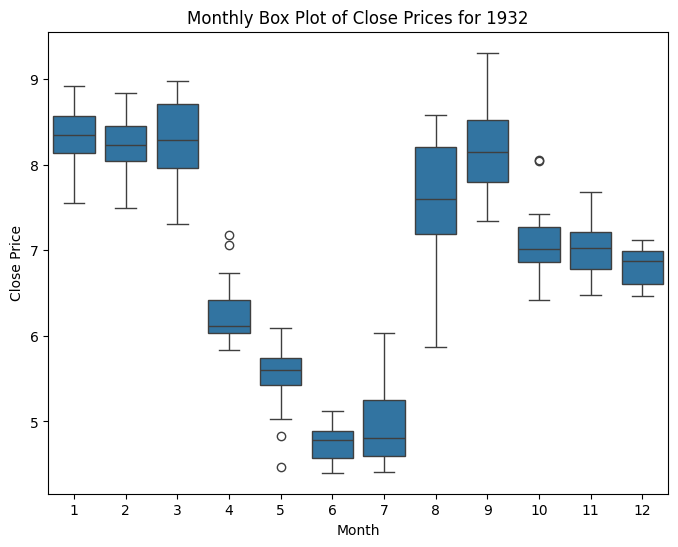

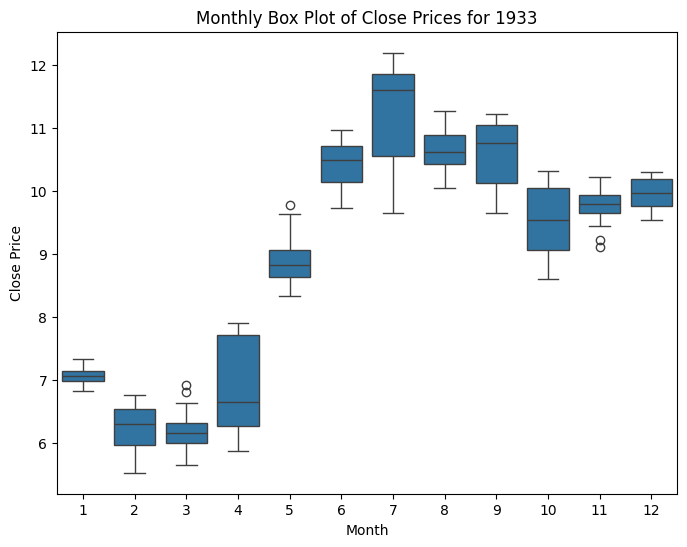

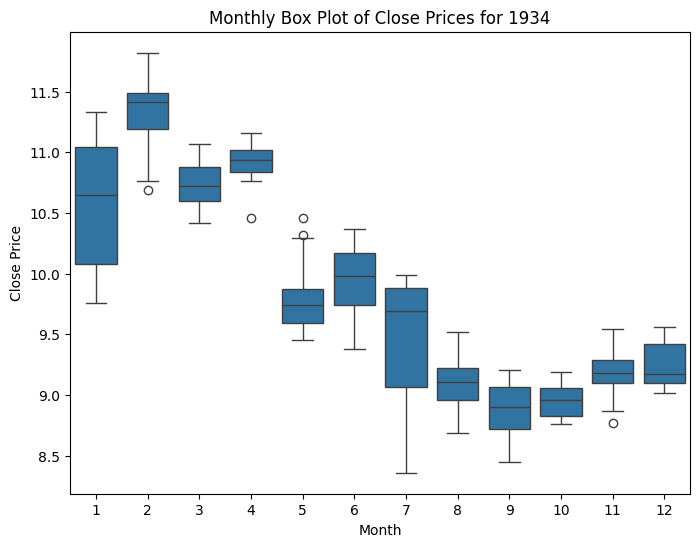

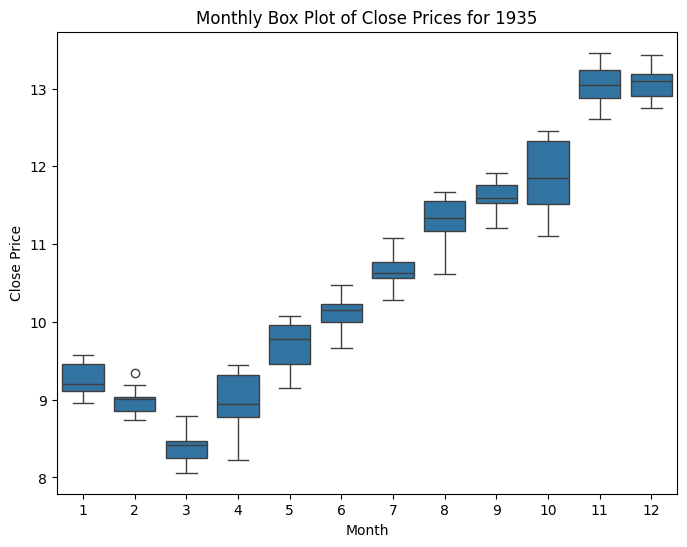

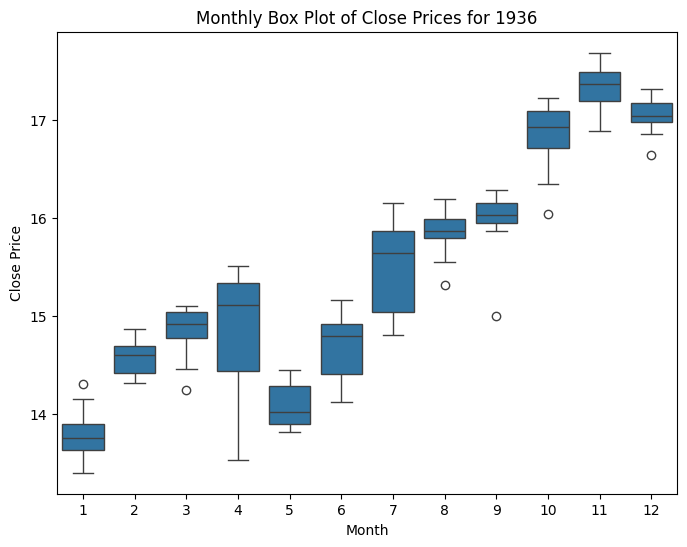

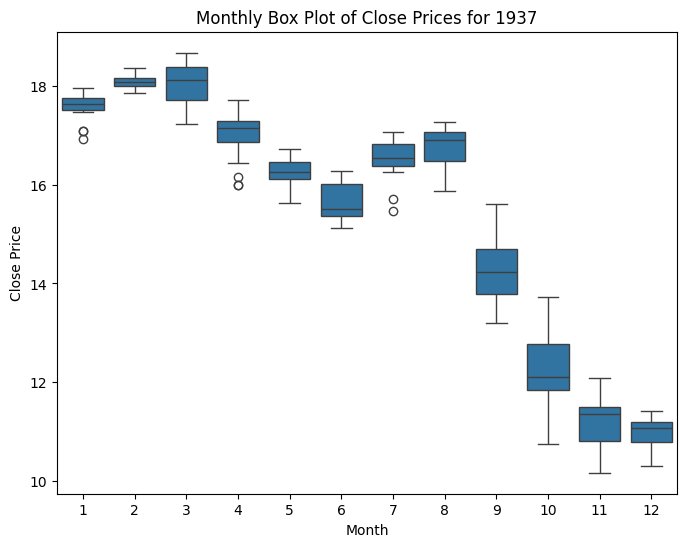

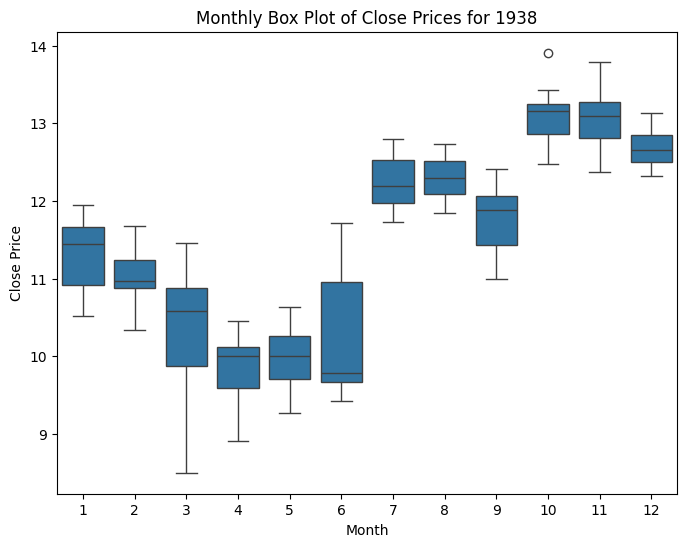

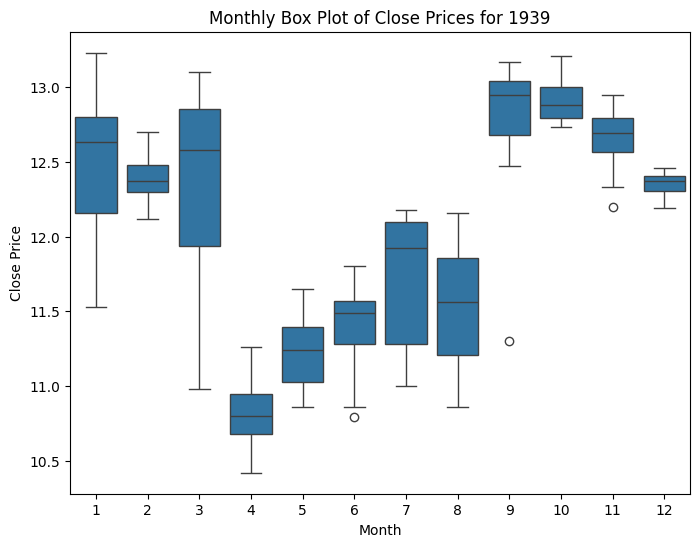

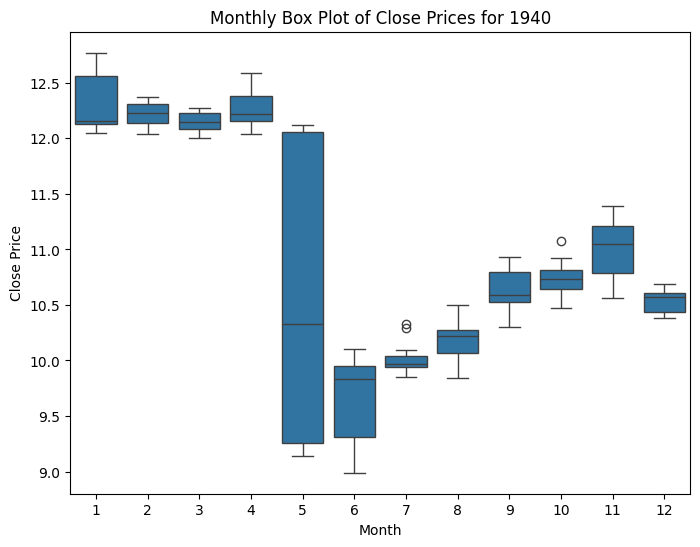

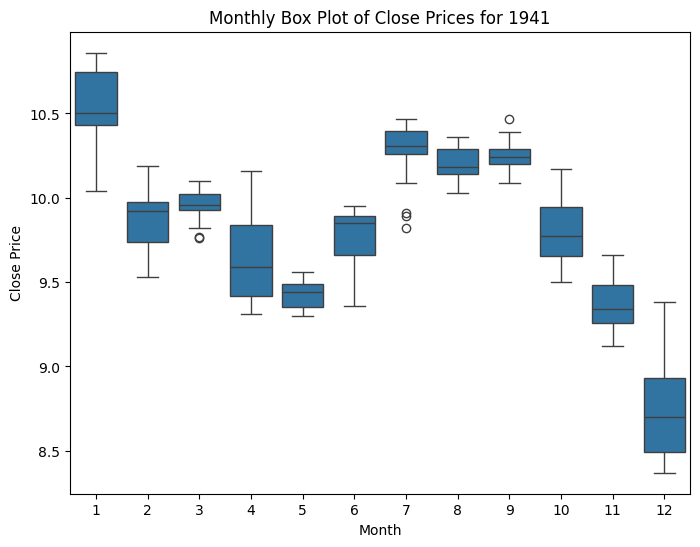

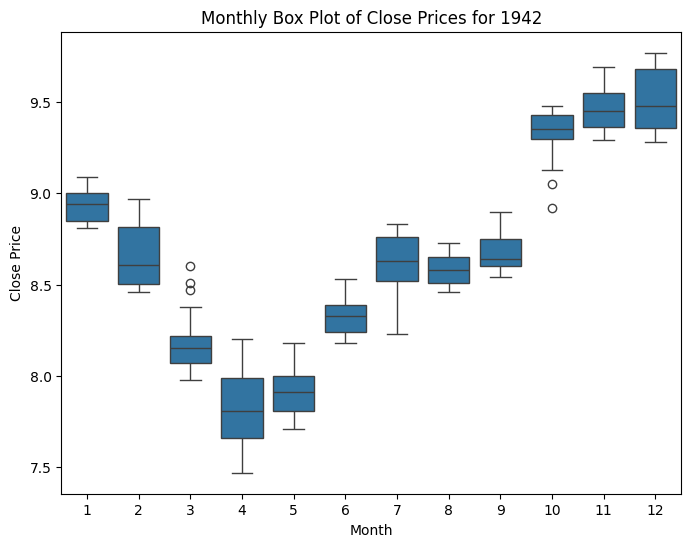

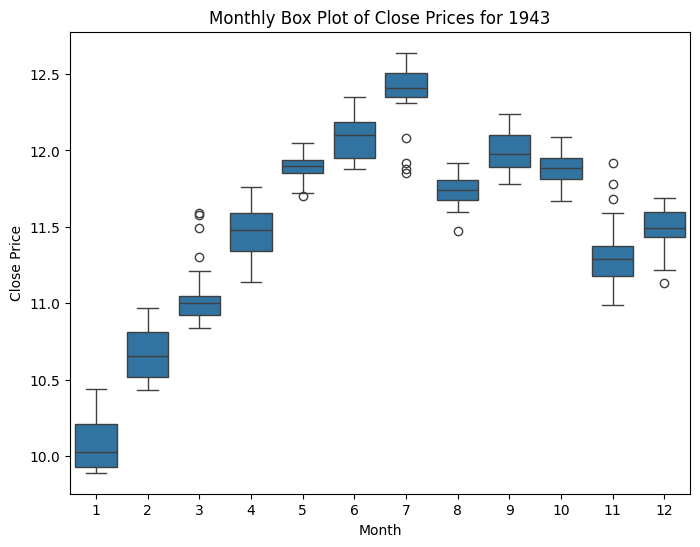

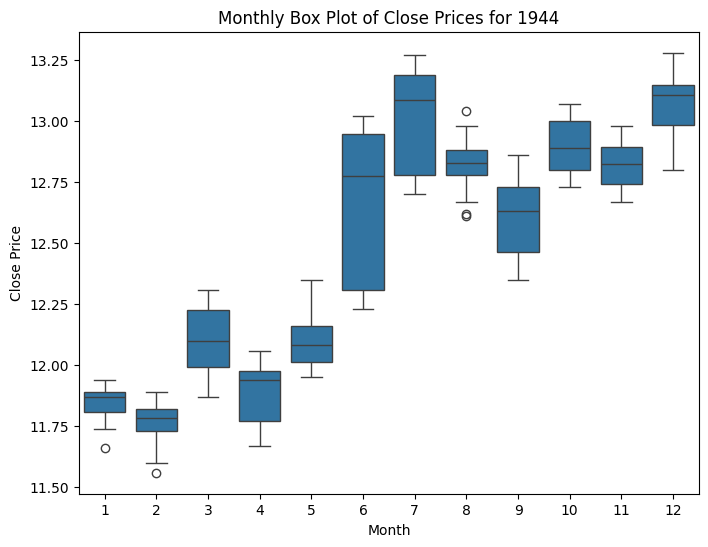

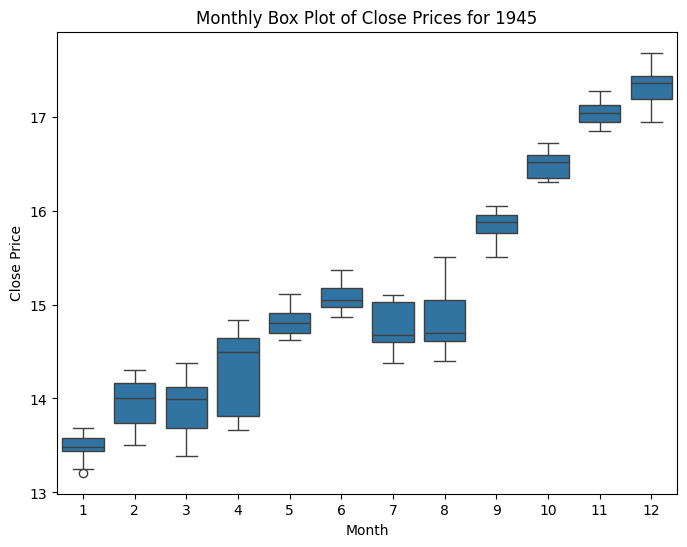

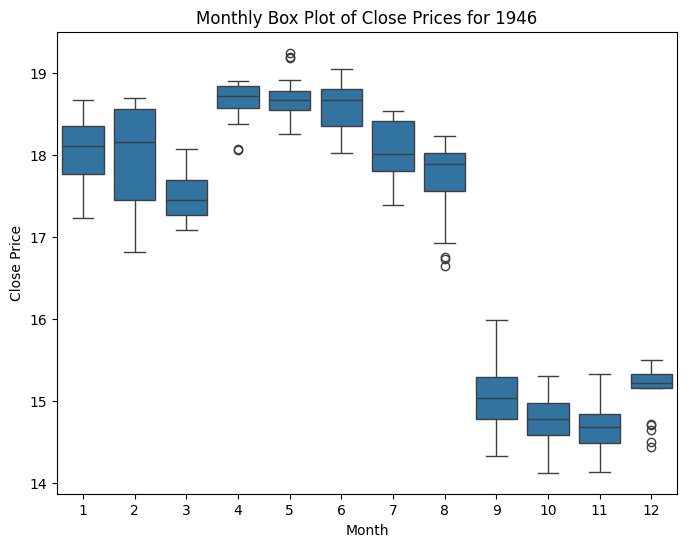

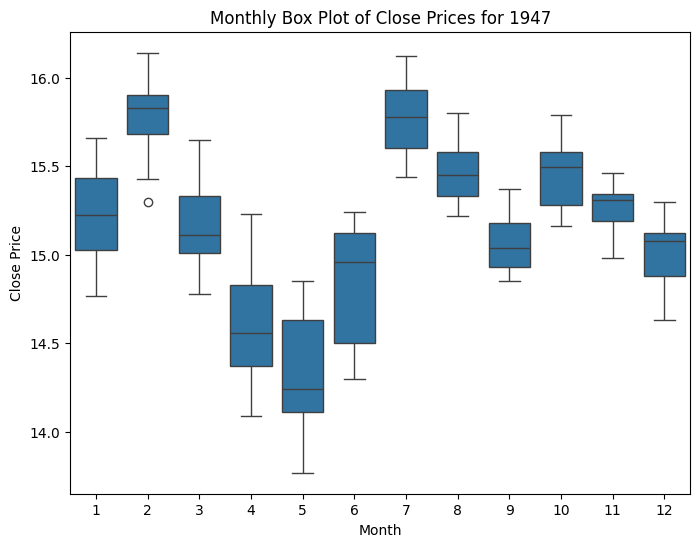

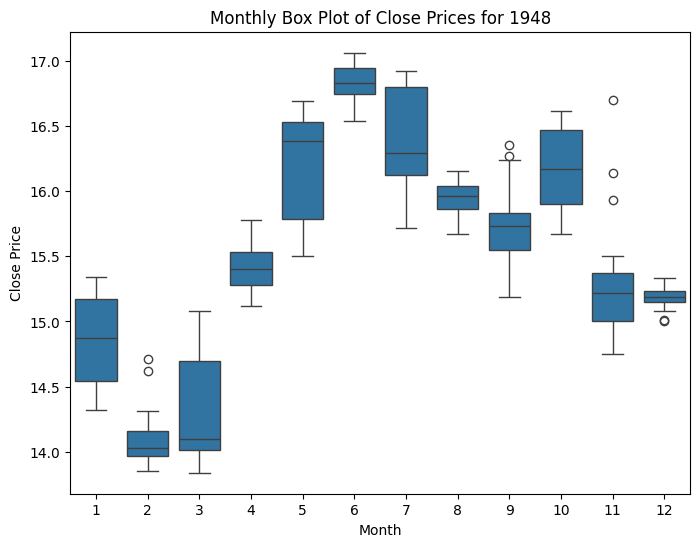

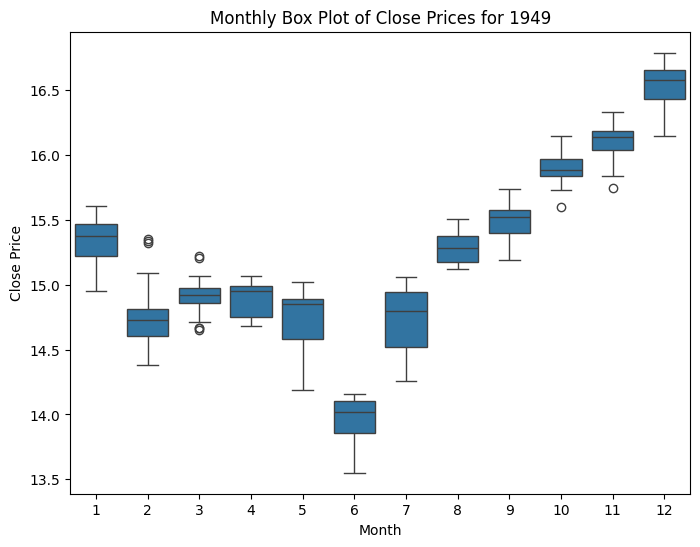

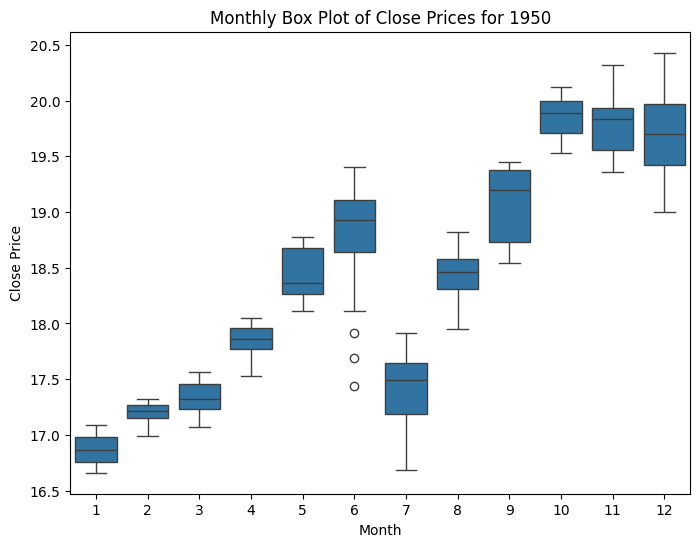

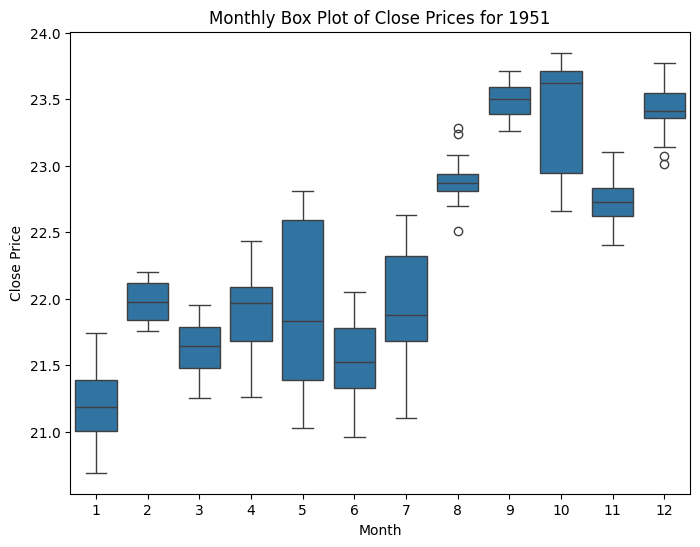

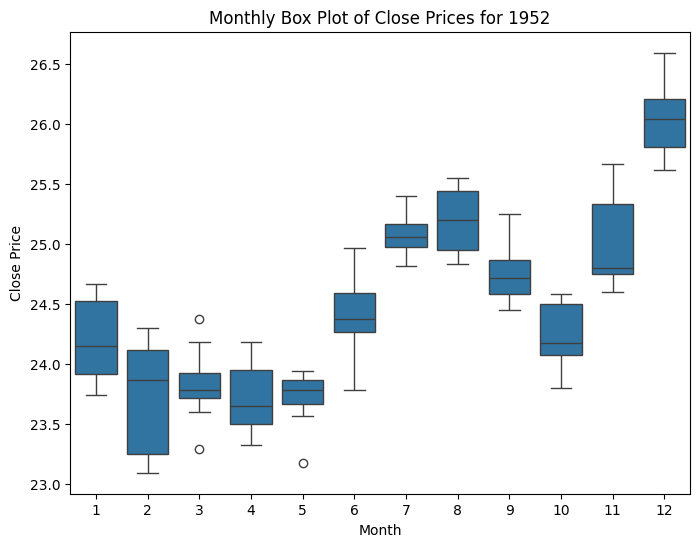

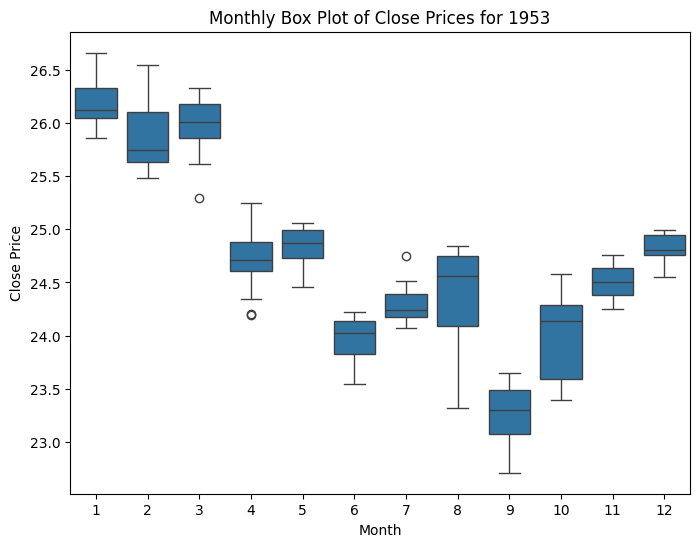

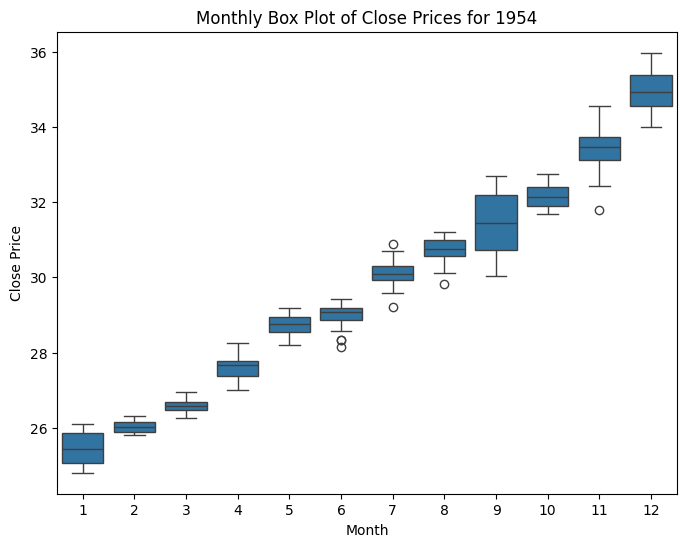

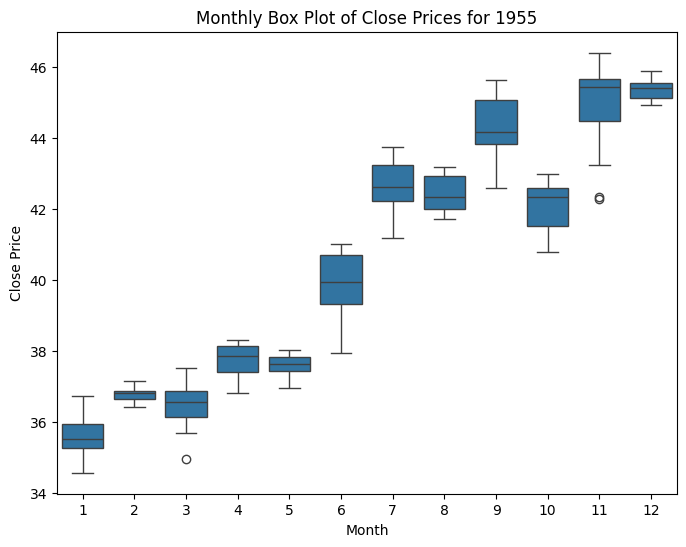

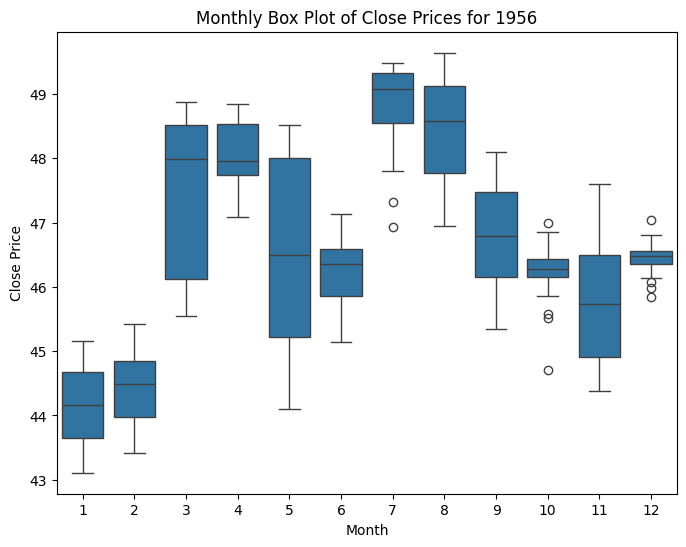

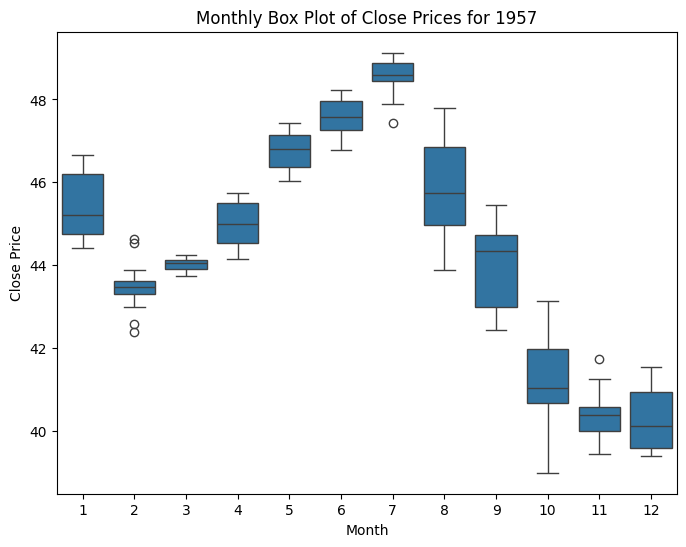

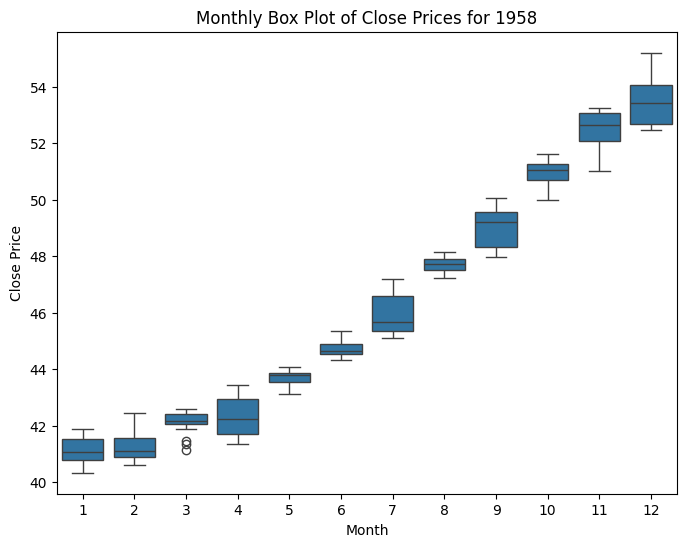

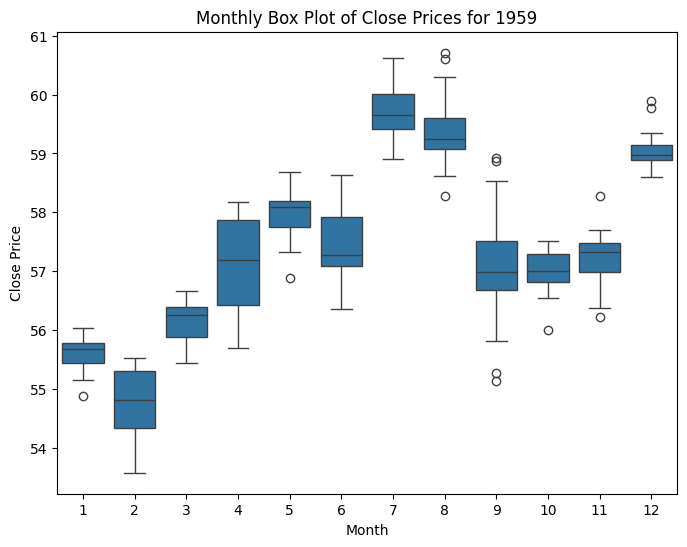

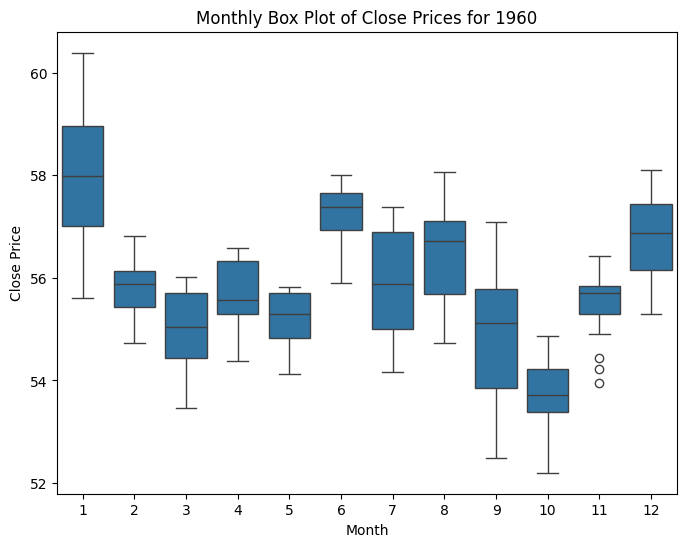

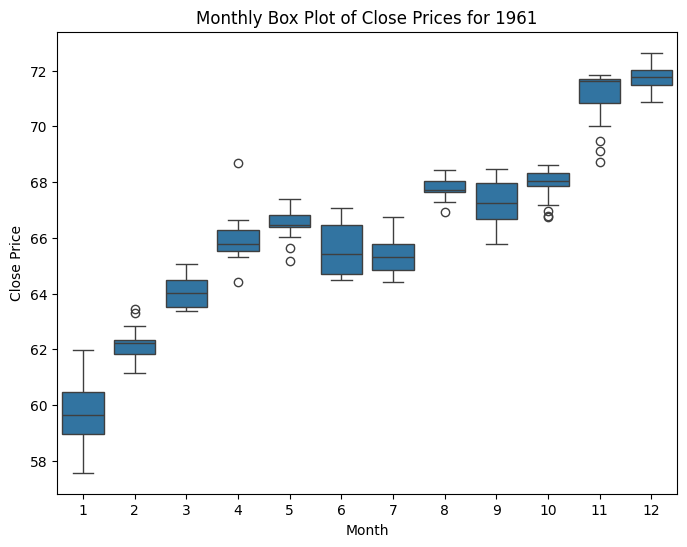

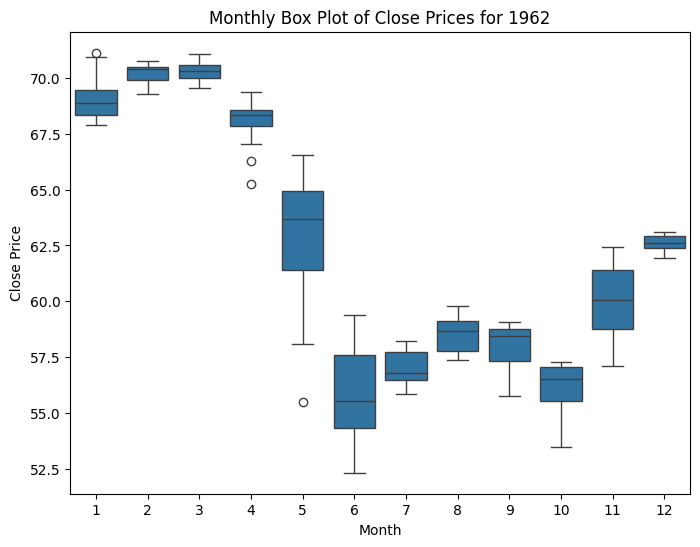

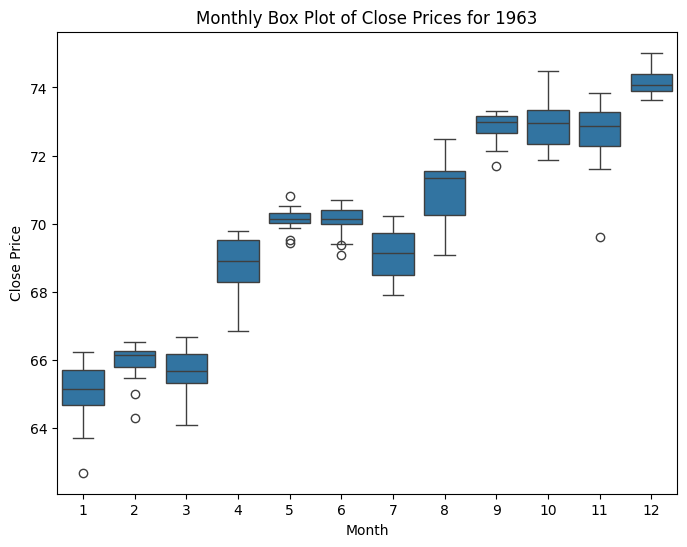

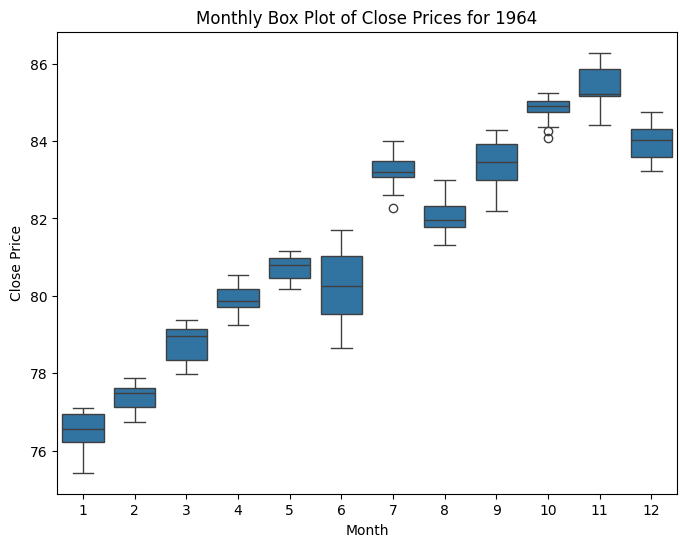

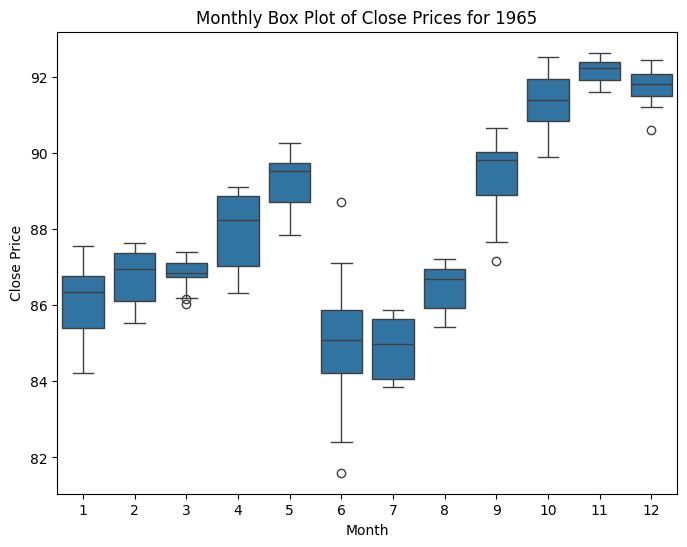

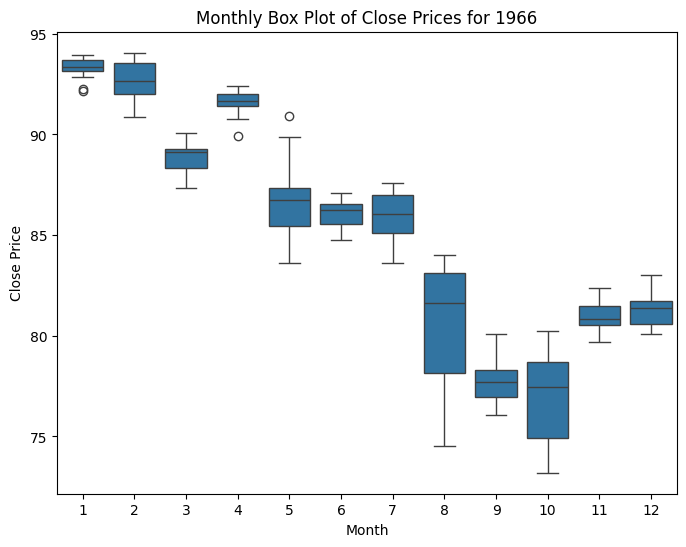

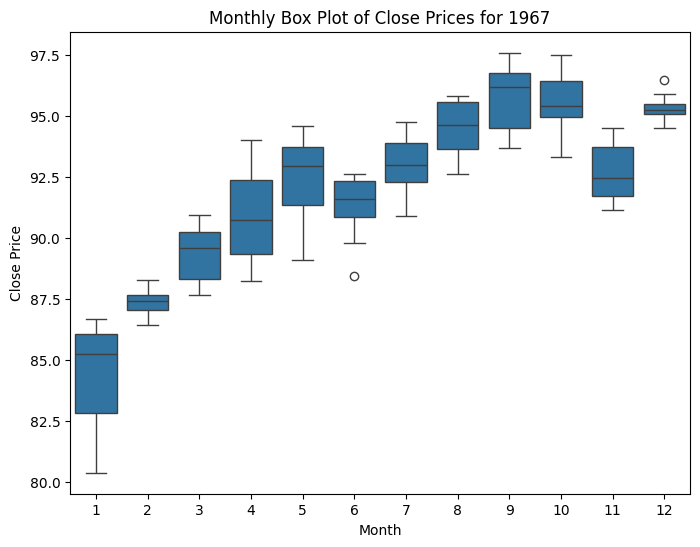

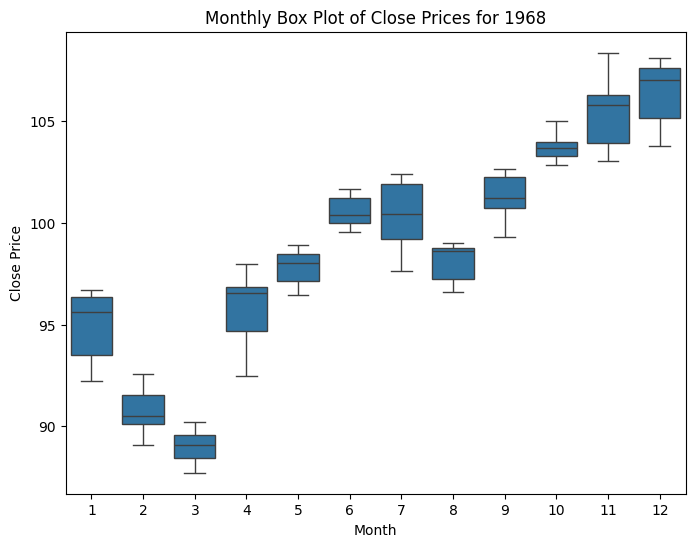

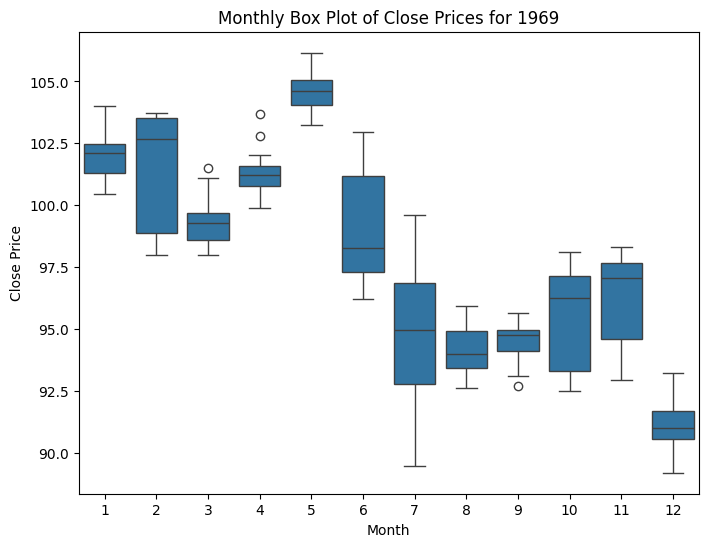

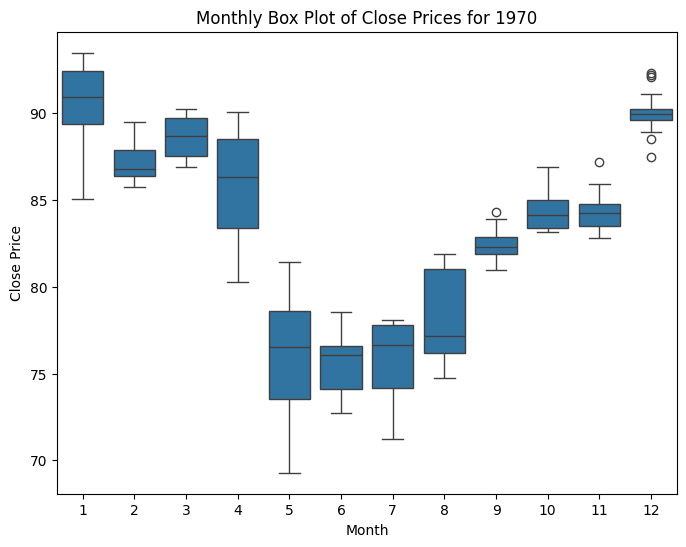

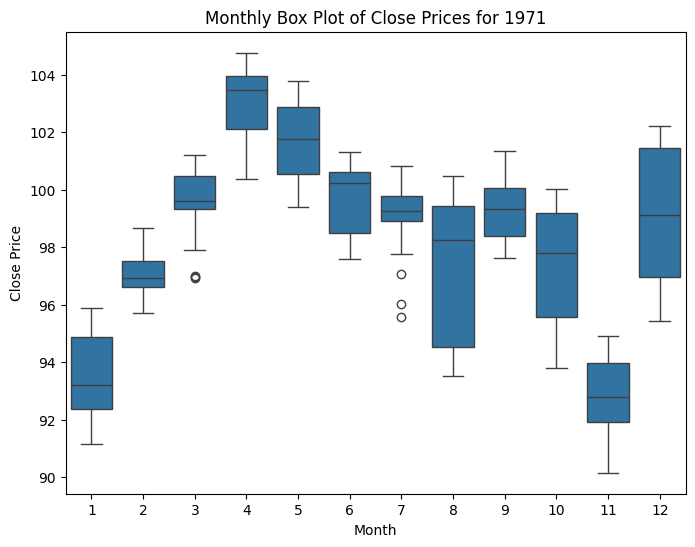

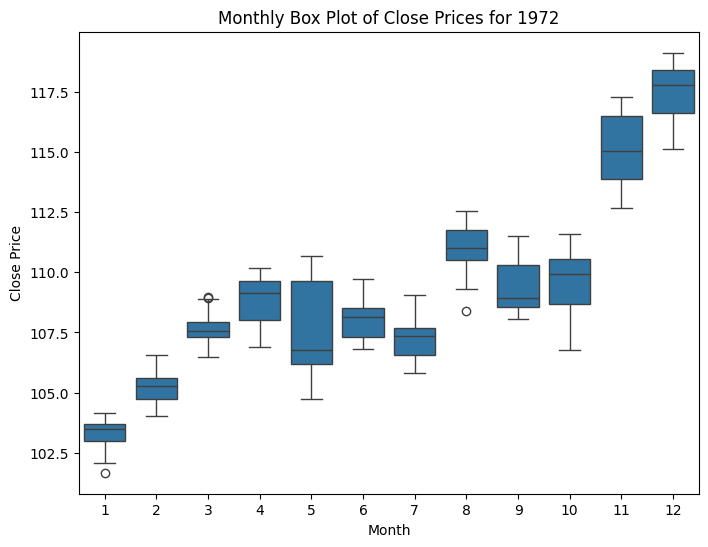

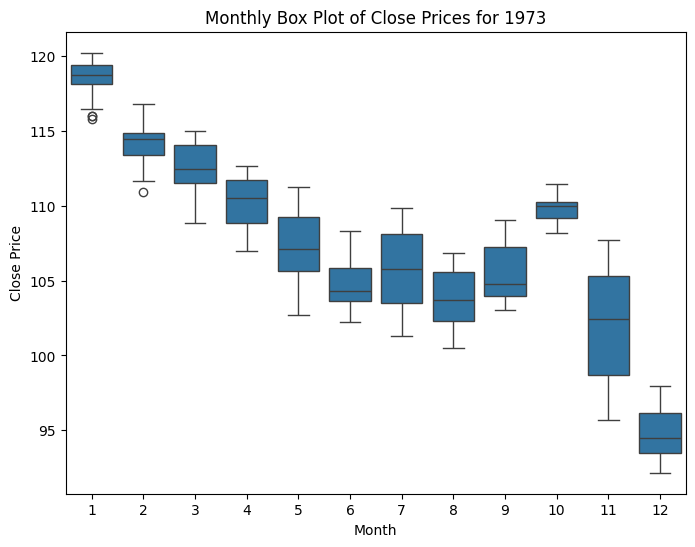

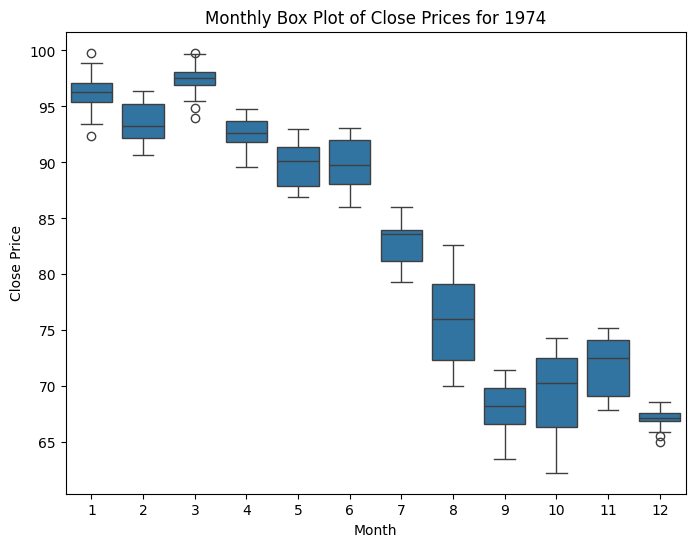

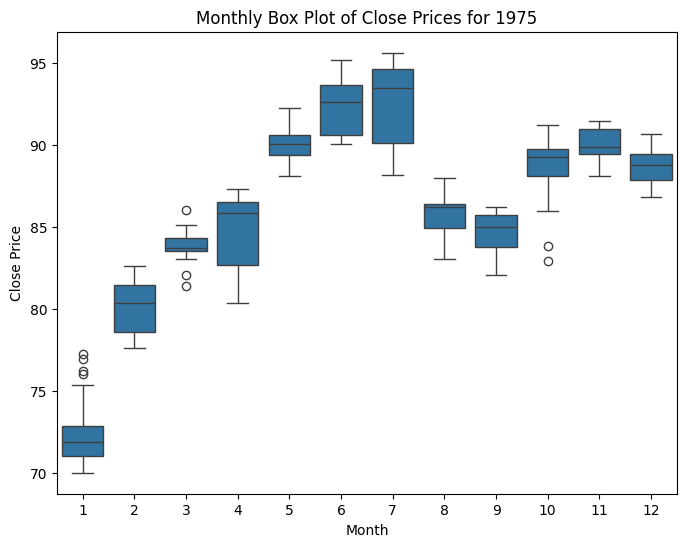

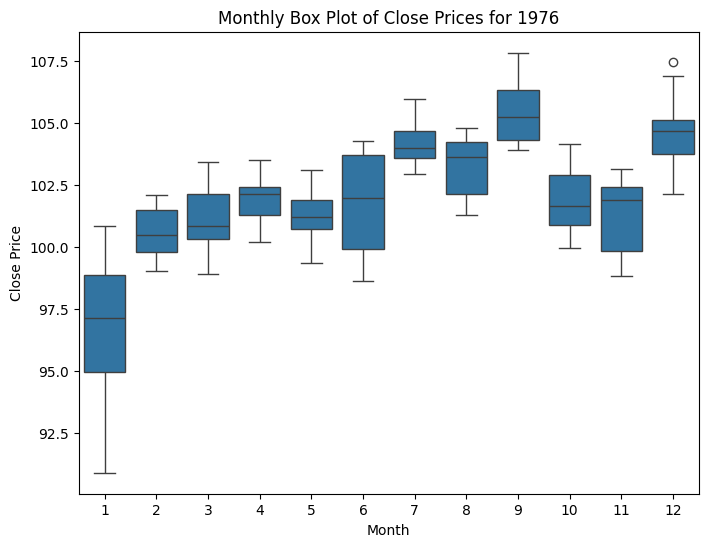

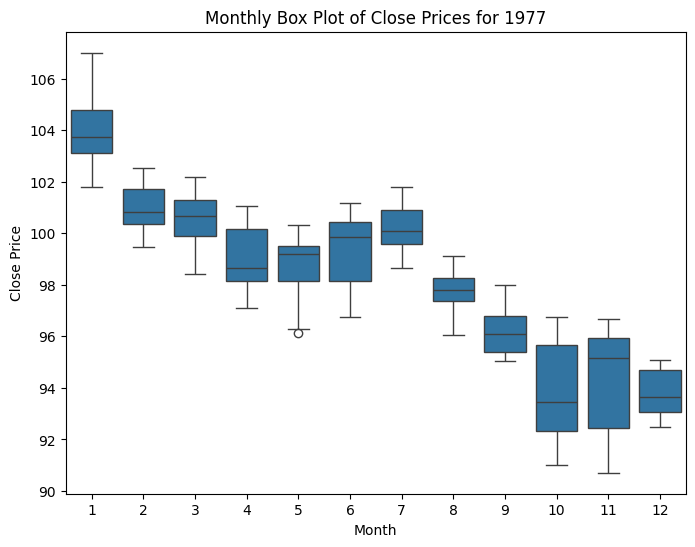

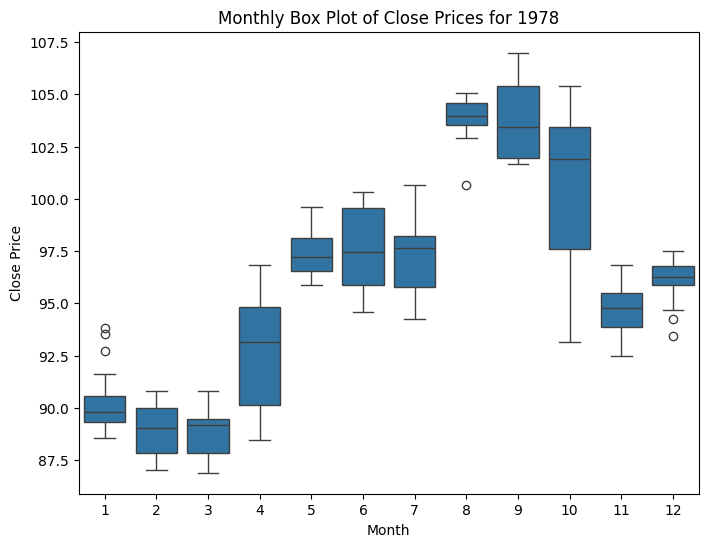

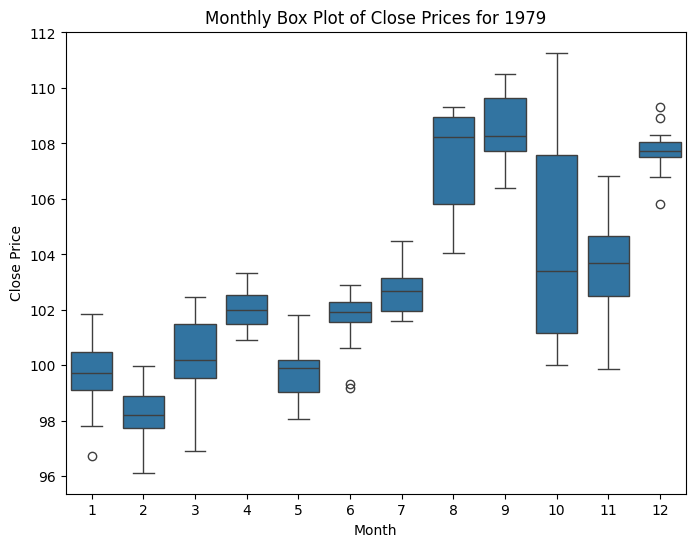

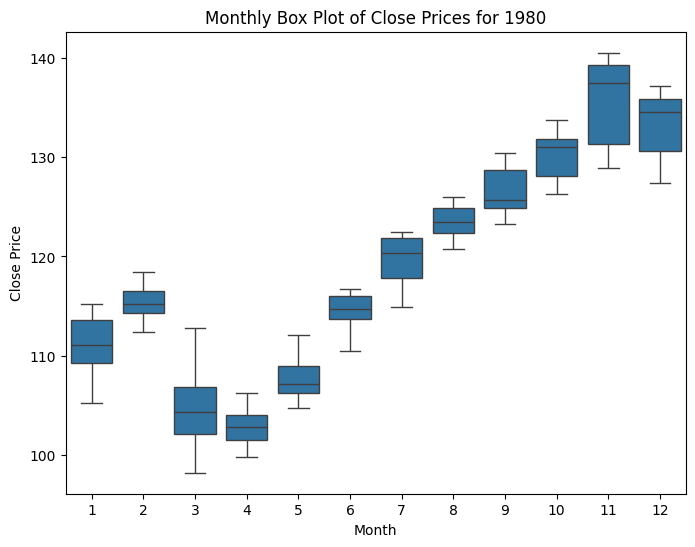

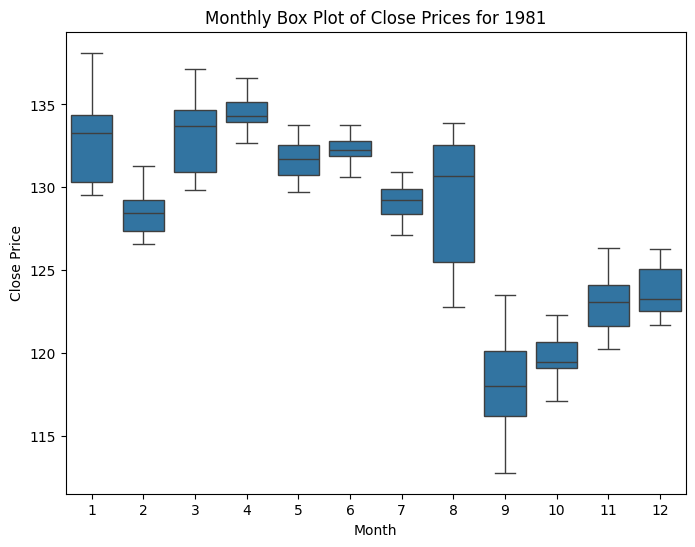

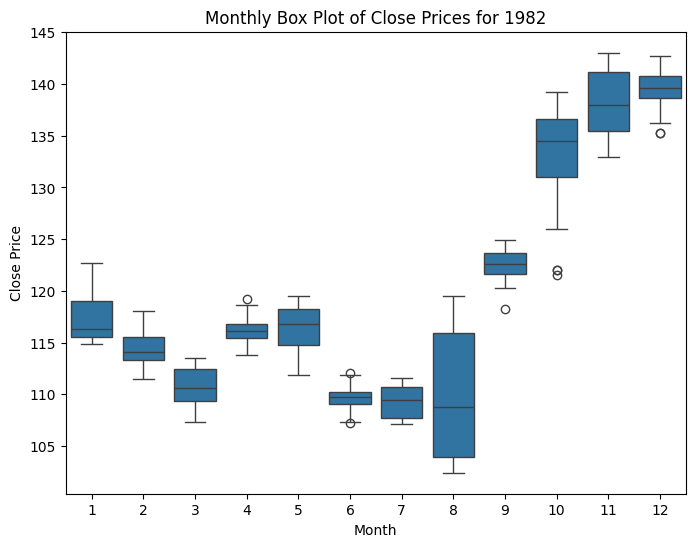

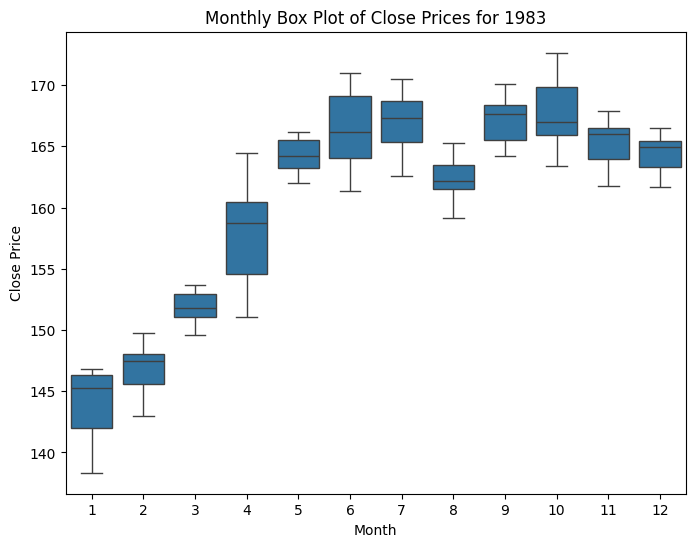

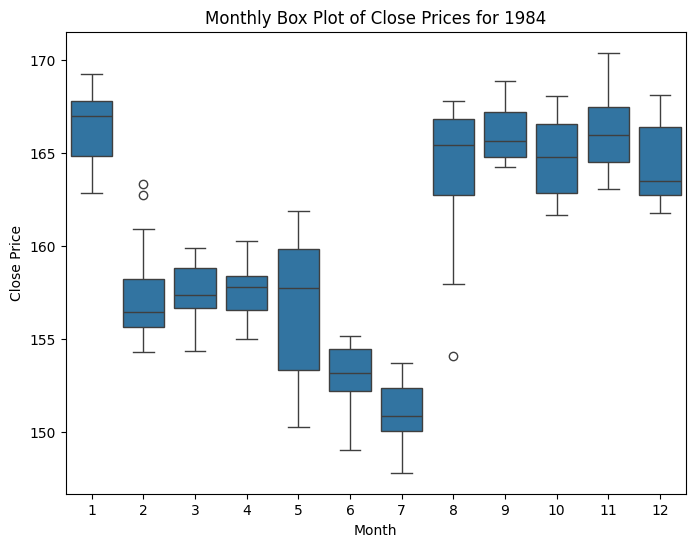

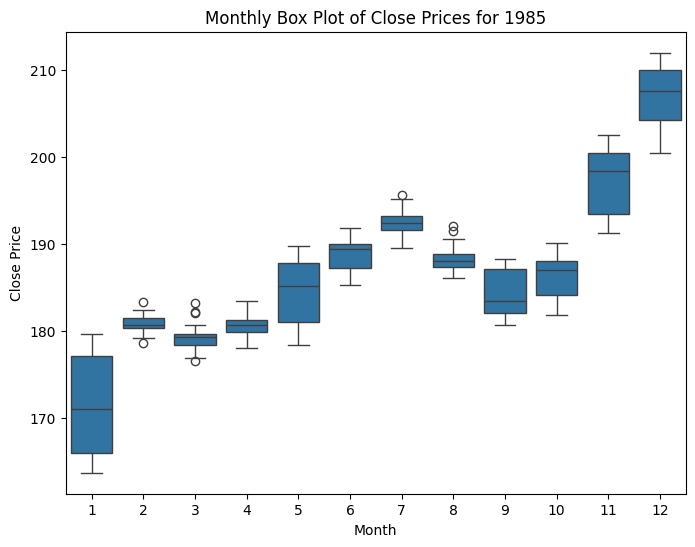

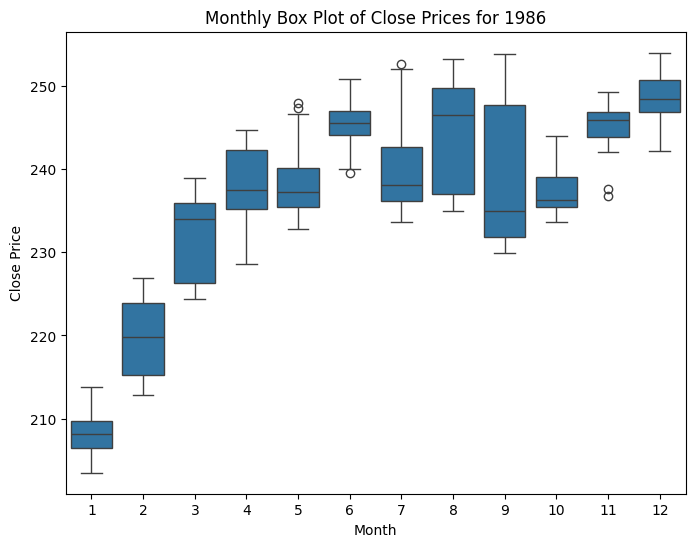

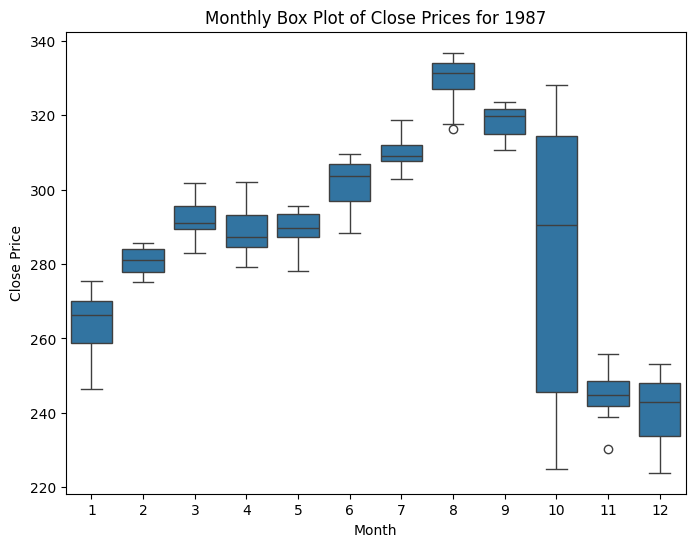

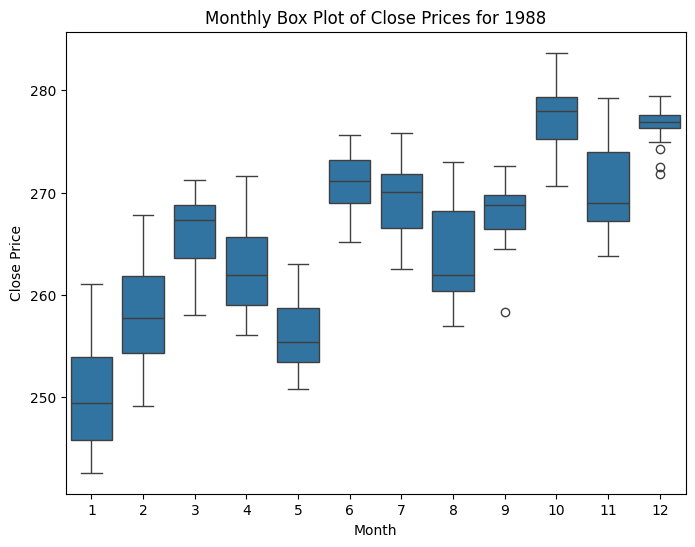

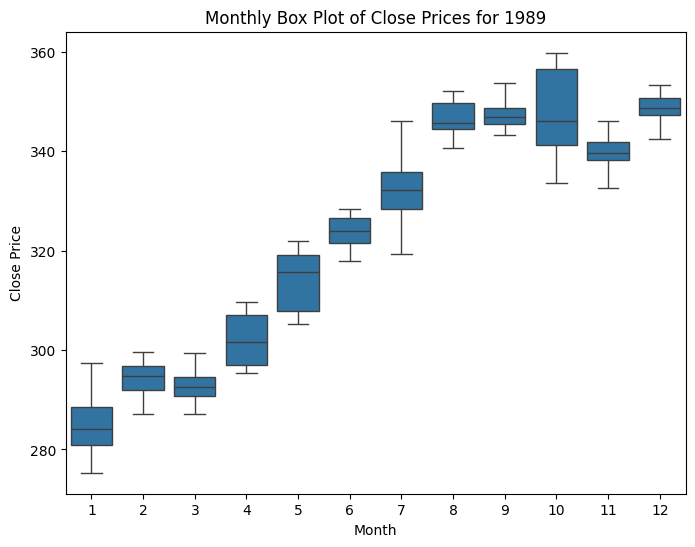

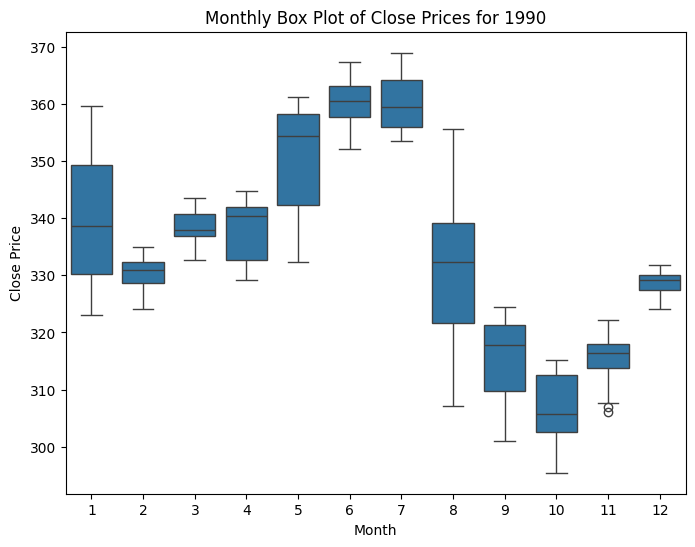

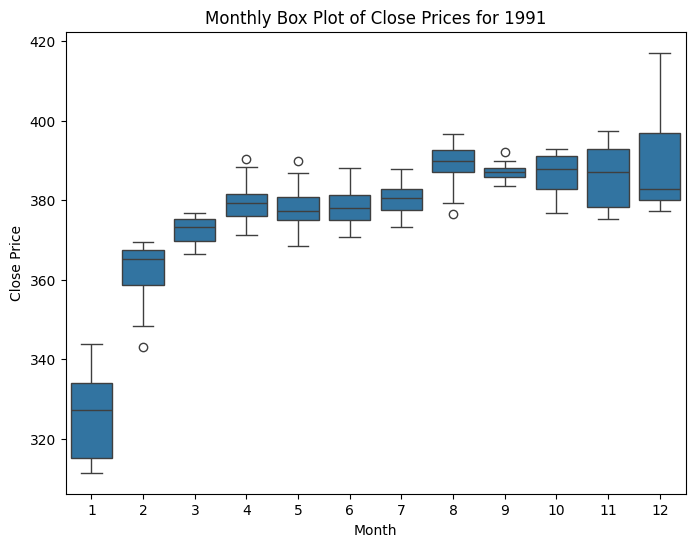

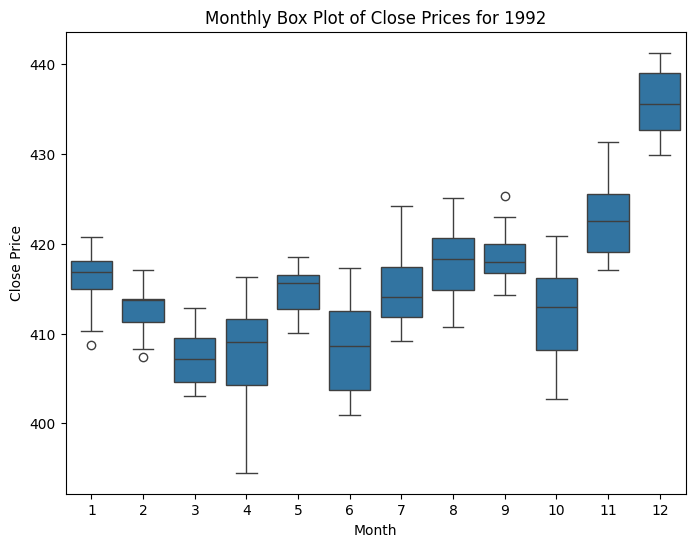

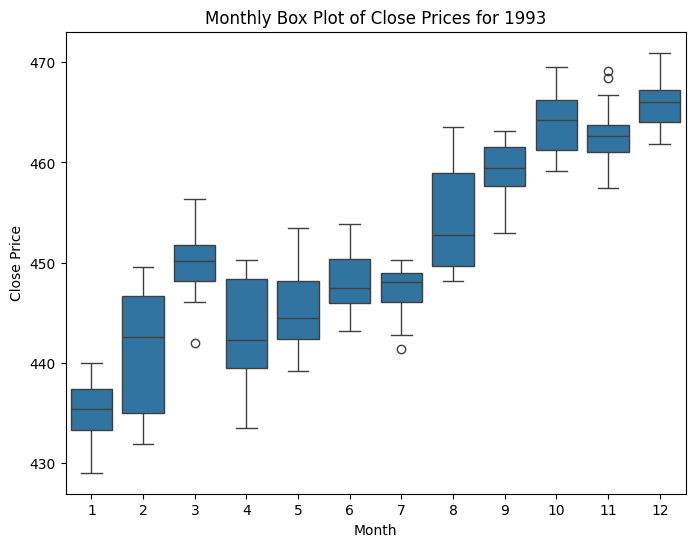

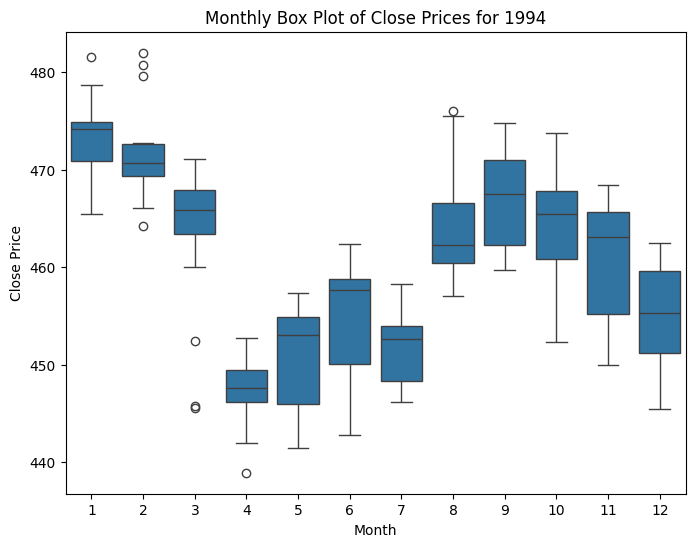

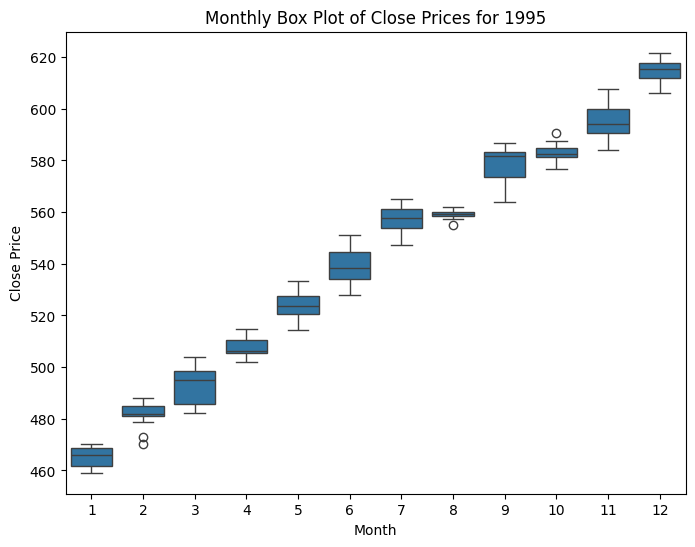

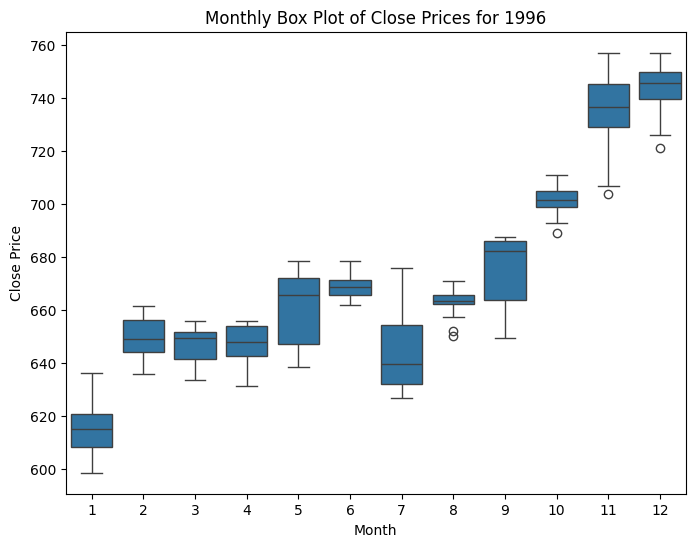

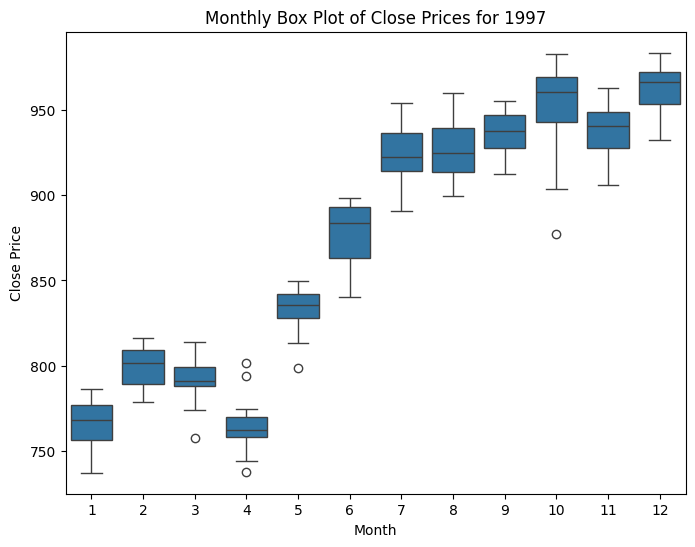

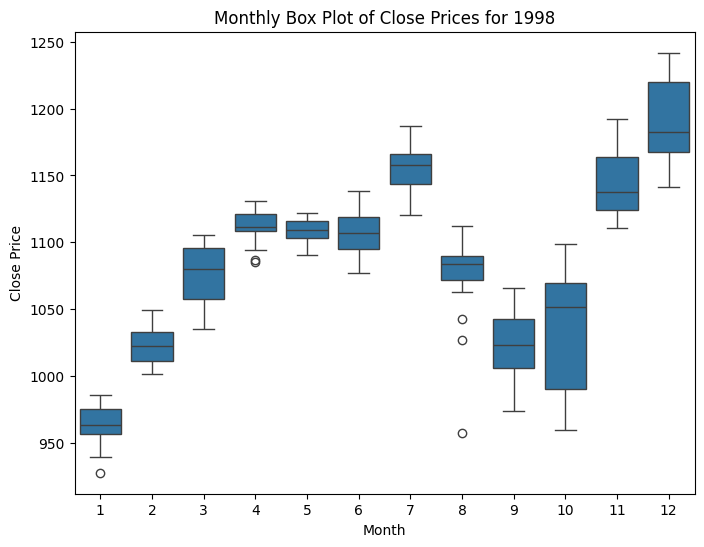

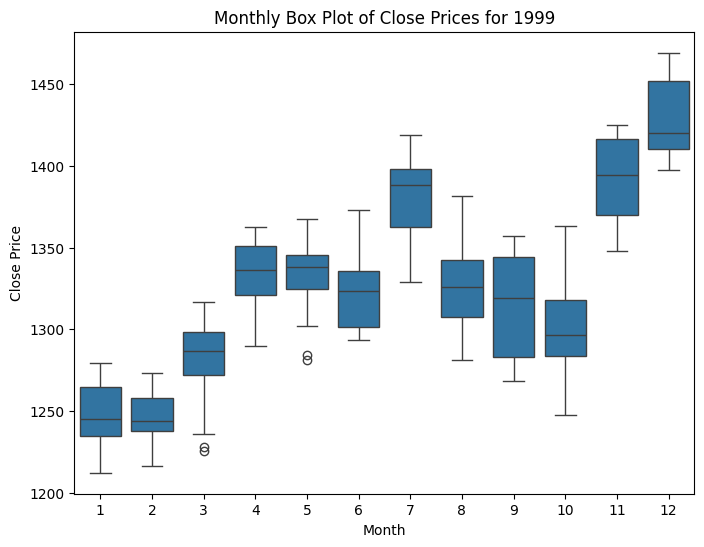

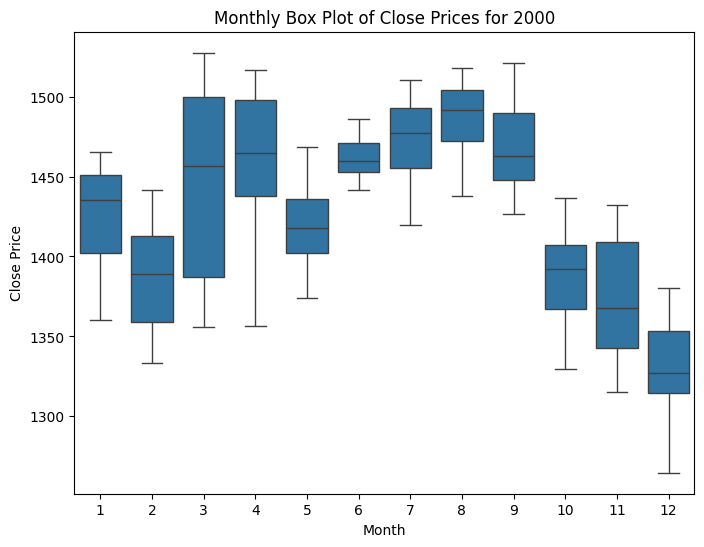

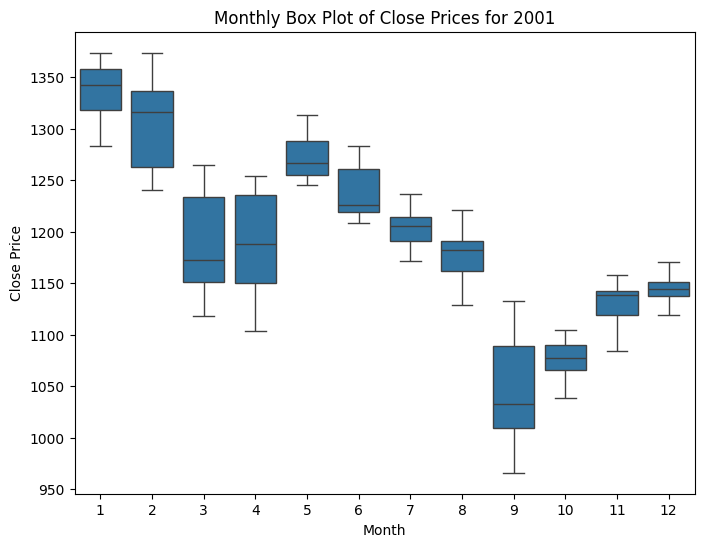

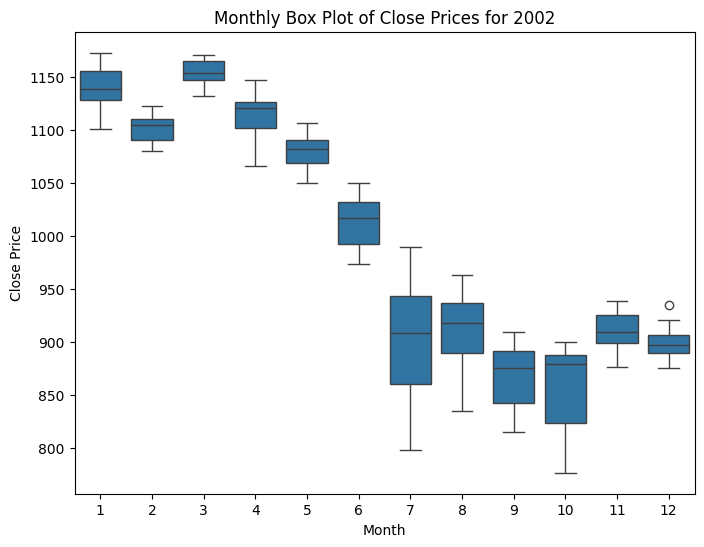

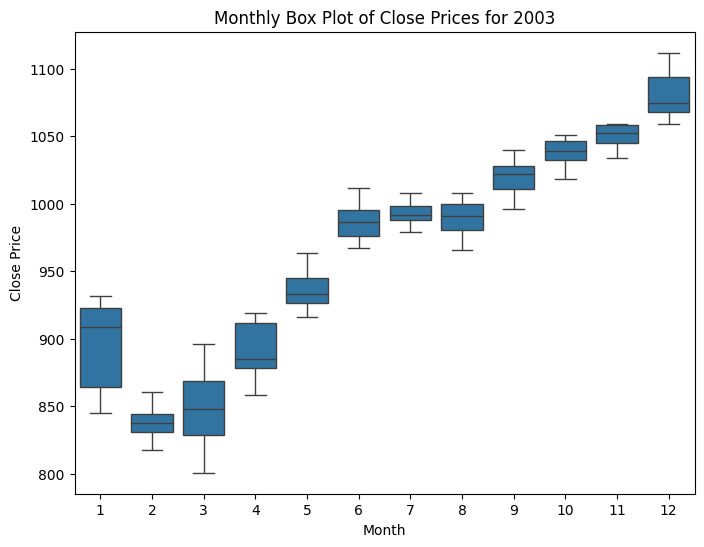

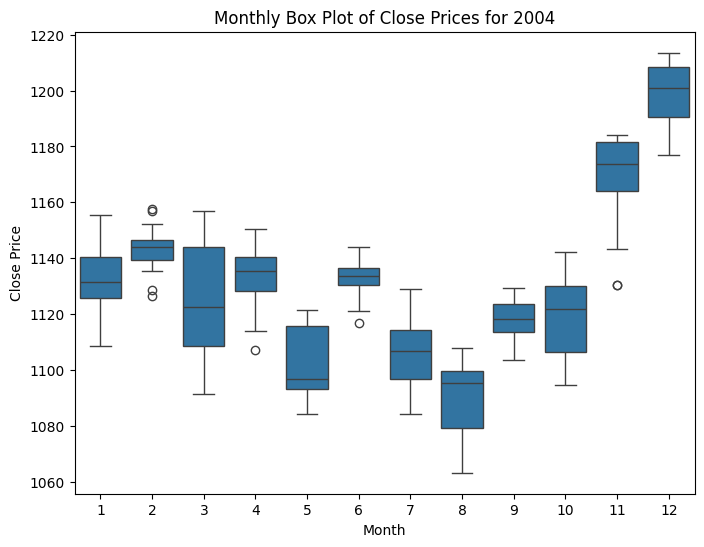

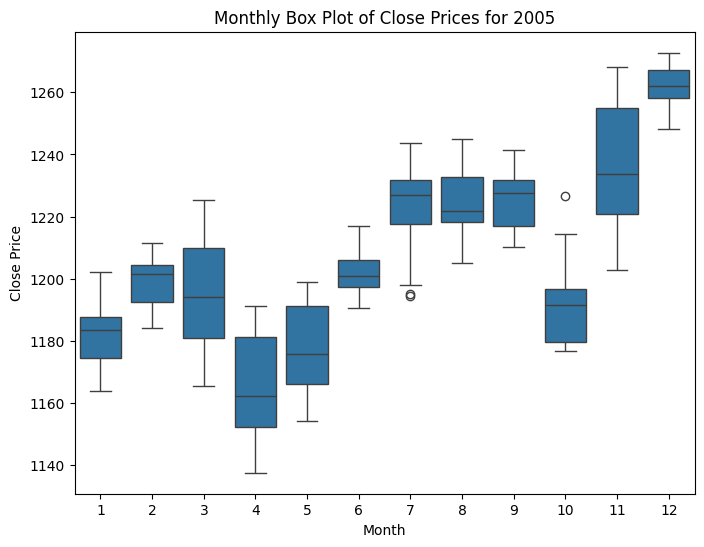

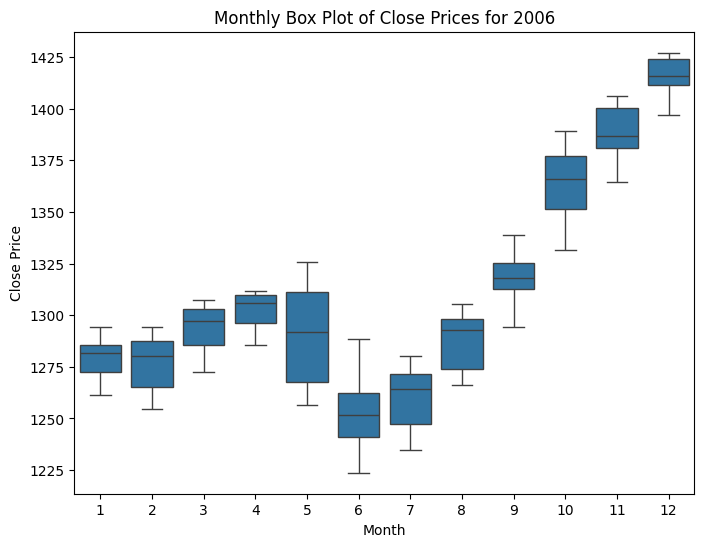

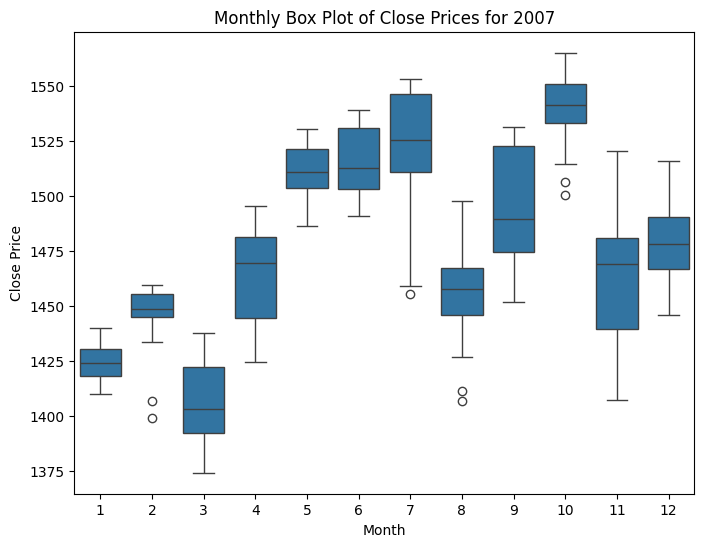

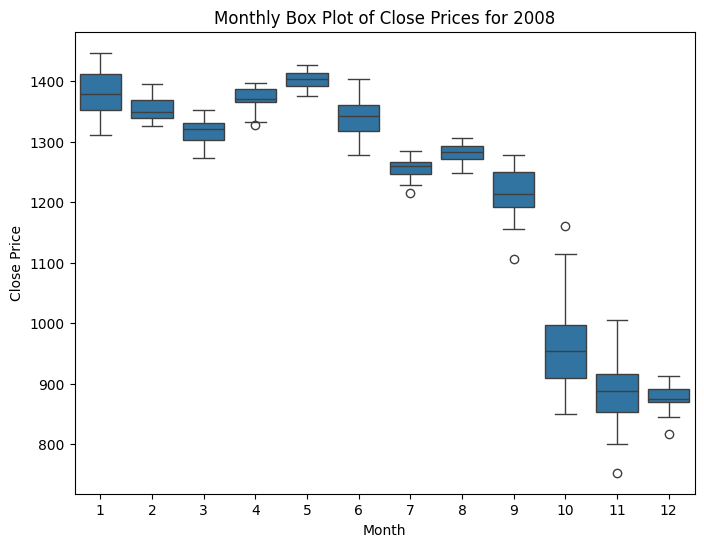

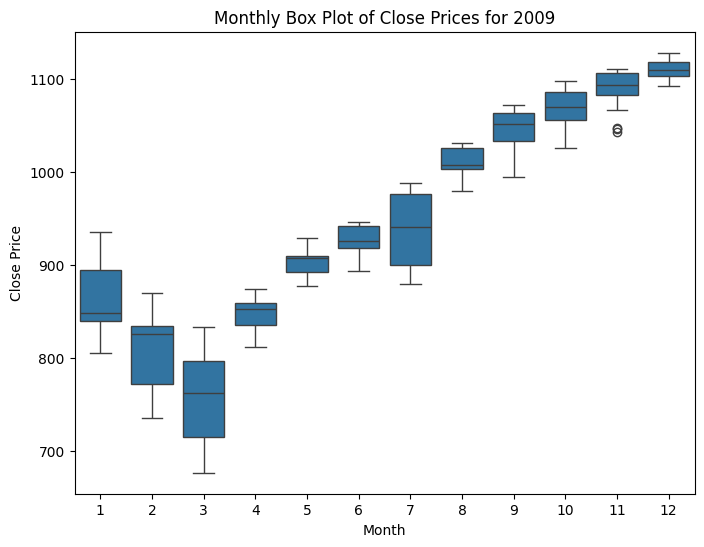

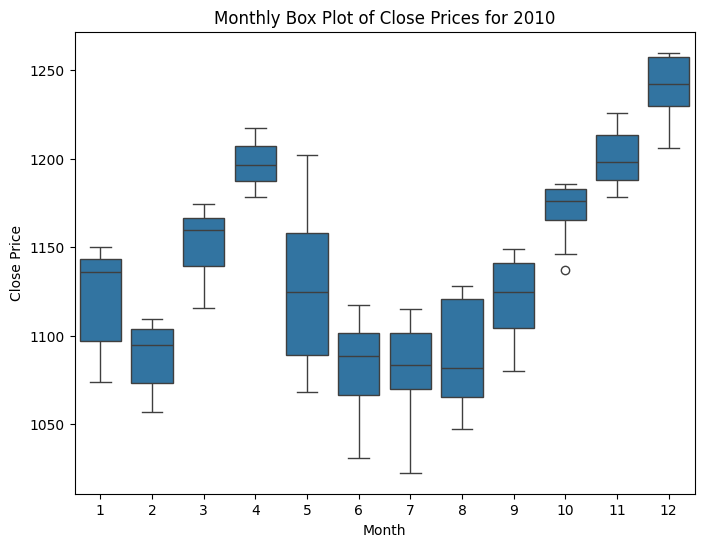

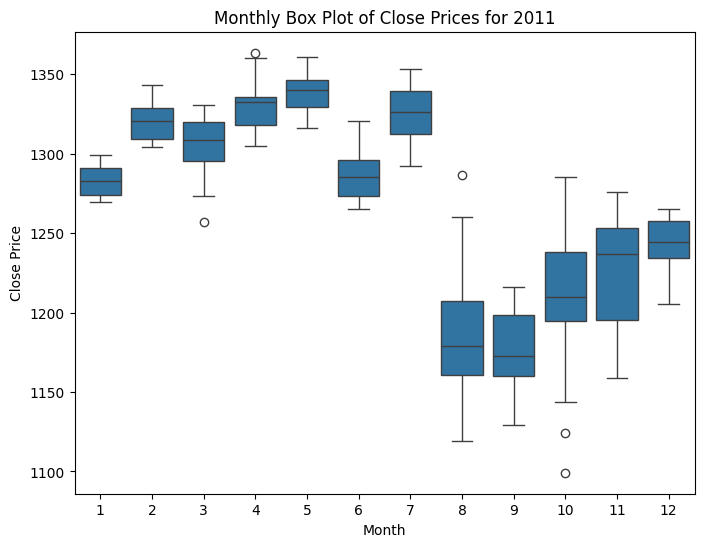

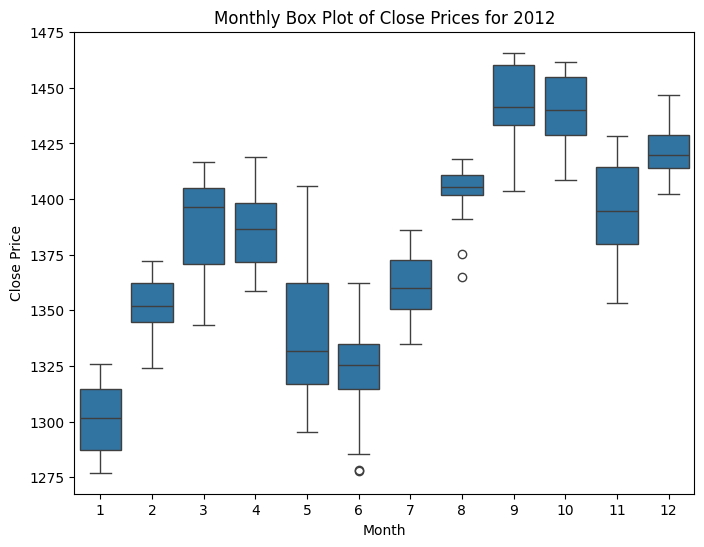

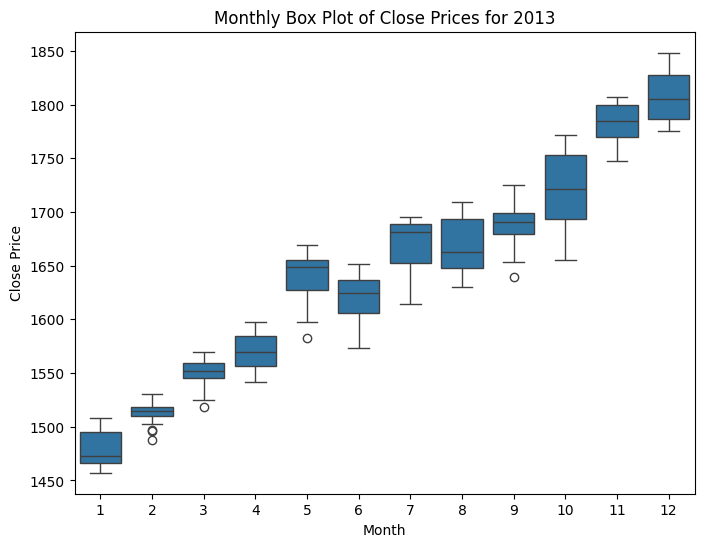

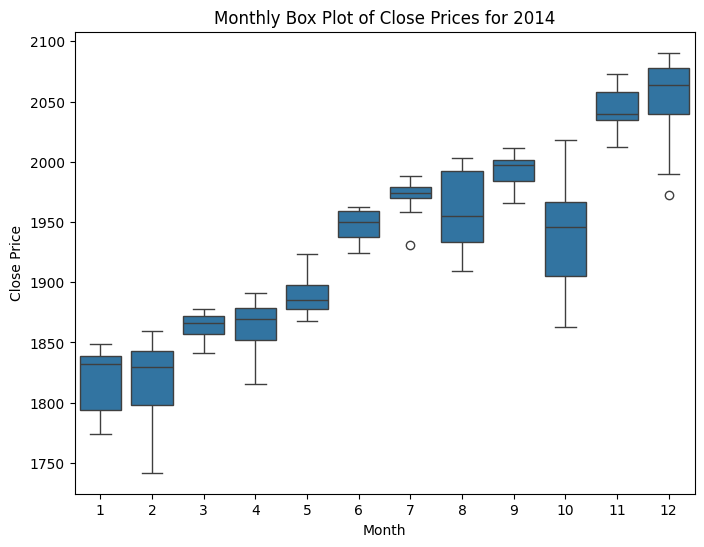

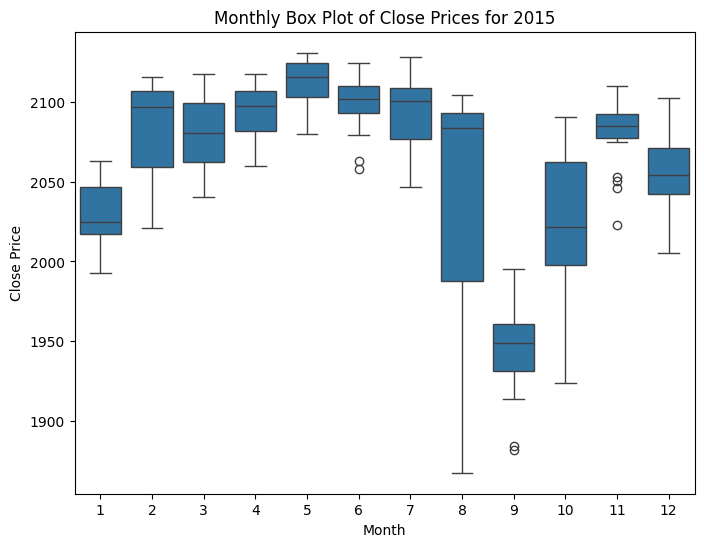

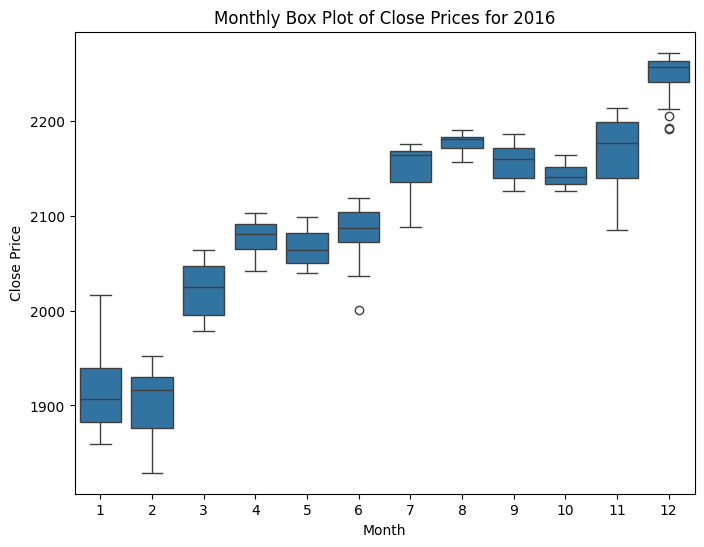

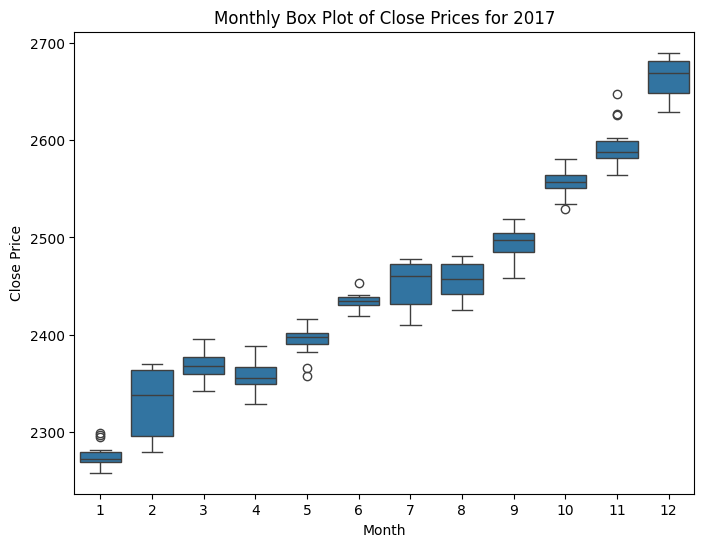

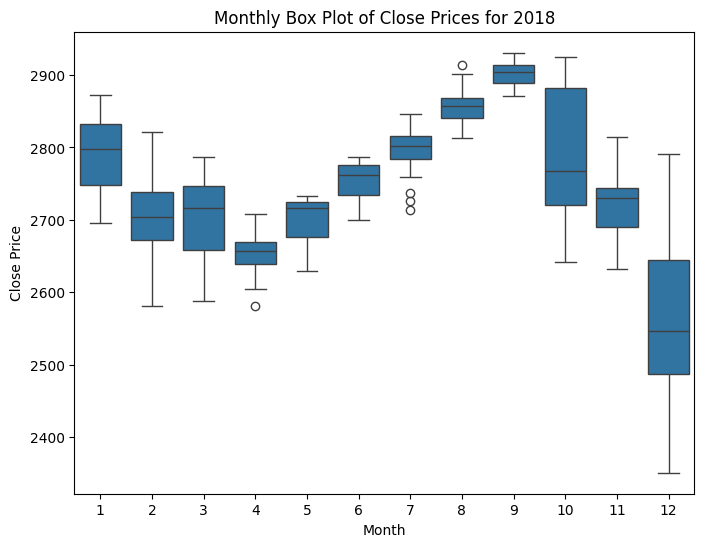

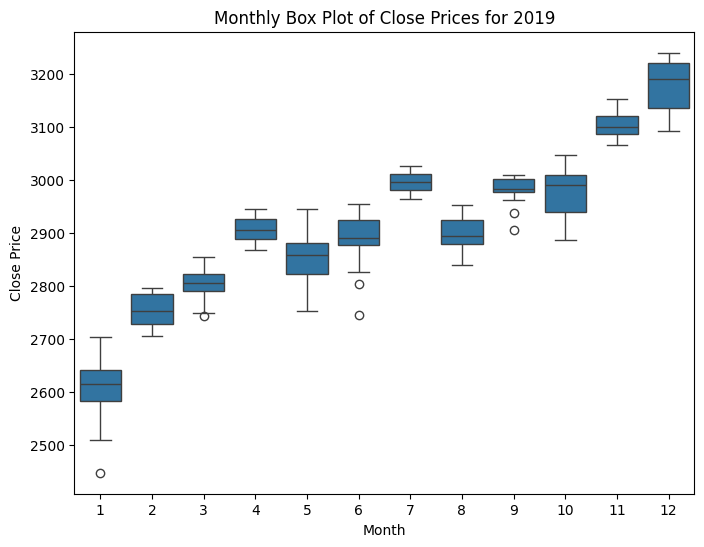

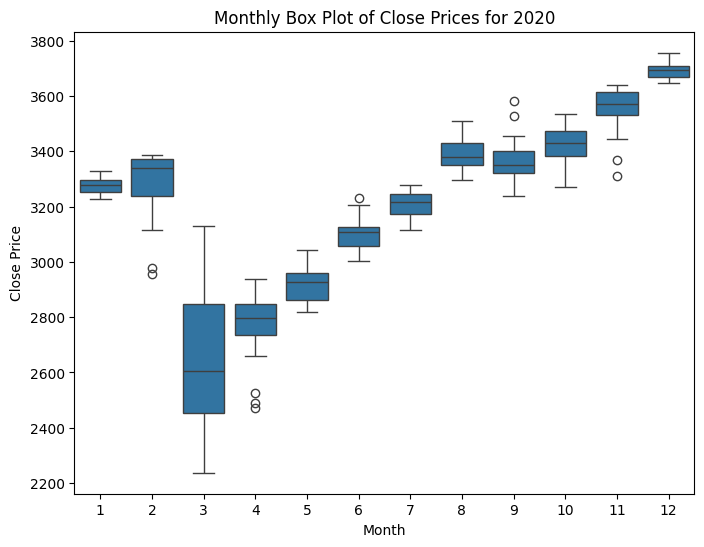

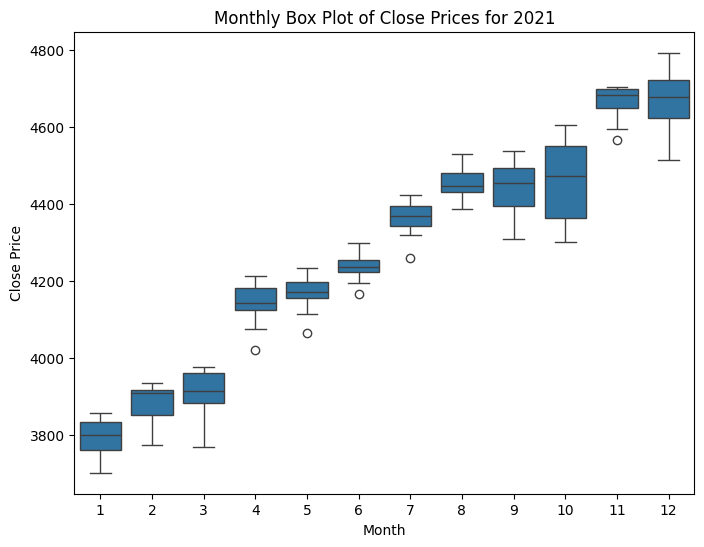

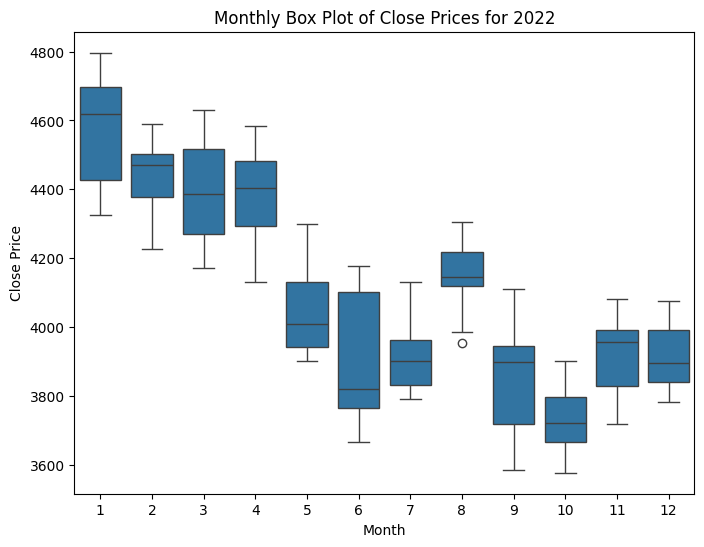

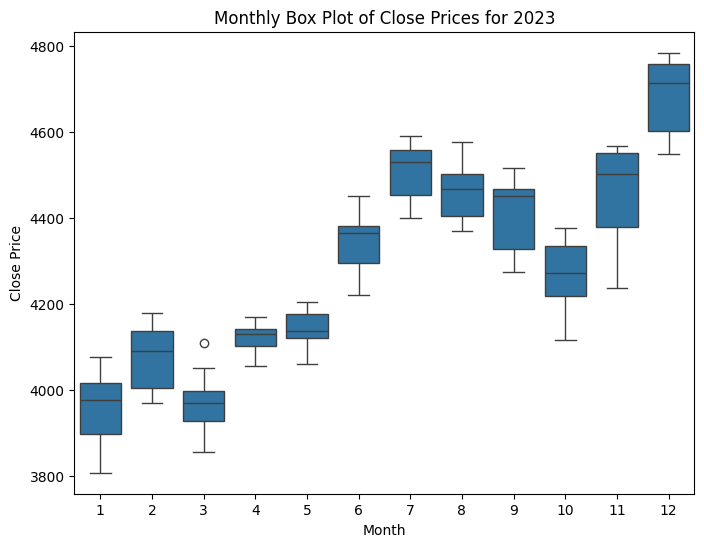

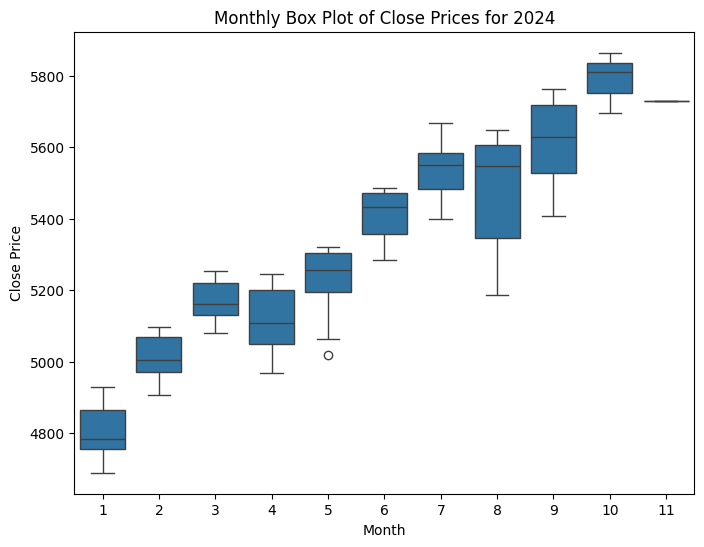

In [9]:
# Rename columns for simplicity
sp500_data.columns = [col[0] if isinstance(col, tuple) else col for col in sp500_data.columns]
sp500_data.rename(columns={'Close': 'Close'}, inplace=True)  # Rename 'Close' column as needed

# Unique list of years in the dataset
years = sp500_data['Year'].unique()

# Loop through each year and plot a box plot
for year in years:
    yearly_data = sp500_data[sp500_data['Year'] == year]  # Filter data for each year
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Month', y='Close', data=yearly_data)
    plt.title(f"Monthly Box Plot of Close Prices for {year}")
    plt.xlabel("Month")
    plt.ylabel("Close Price")
    plt.show()
